# Projet 9 :

__Scénario :__

Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

L'objectif etant de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter les poulets. 

Nous approfondirons ensuite l'étude de marché. 

# <u>Import des librairies et des CSV :<u>

### Import des librairies :

In [1]:
# Importation des Librairies :

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import datetime

# Librairie de visualisation :
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

# Pour l apprentissage non supervise :
from sklearn.cluster import KMeans # Pour la creation de clustering 
from sklearn import cluster # k-means sur les données centrées et réduites

from scipy.cluster.hierarchy import ward, fcluster

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Import des CSV :

In [2]:
# Importation des CSV :

Disponibilite_Alimentaire_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv') 
Population_2000_2018 = pd.read_csv('Population_2000_2018.csv')
Continent = pd.read_csv('Continent.csv',sep=';')
Stabilité = pd.read_csv('Insécurité_Stabilité.csv')
PIB = pd.read_csv('PIB.csv')
Code_Zone = pd.read_csv('ISO2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'DisponibiliteAlimentaire_2017.csv'

### Modification interne des CSV avant analyse :

In [3]:
# Pour mettre les années uniquements de 2013 à 2017 pour population :
Population_2000_2018 = Population_2000_2018.drop(Population_2000_2018[Population_2000_2018.Année < 2013 ].index)
Population_2013_2017 = Population_2000_2018.drop(Population_2000_2018[Population_2000_2018.Année == 2018 ].index)

# Filtrage pour viande volaille dans disponibilité_alimentaire :
Disponibilité_volailles = Disponibilite_Alimentaire_2017[Disponibilite_Alimentaire_2017[('Produit')].str.contains('Viande de Volailles')]

# Filtrage pour viande dans disponibilité_alimentaire :
Origine_animale = ['Viande de Anim Aquatiq','Viande de Bovins',"Viande d'Ovins/Caprins",'Viande de Suides','Viande de Volailles','Viande, Autre','Abats Comestible','Graisses Animales Crue','Oeufs','Poissons Eau Douce','Poissons Pelagiques','Poissons Marins', 'Autres','Crustacés','Cephalopodes','Mollusques', 'Autres','Animaux Aquatiques Autre','Viande de Anim Aquatiq']

NameError: name 'Population_2000_2018' is not defined

## Mise en place des DF  :

### Disponibilite_Alimentaire_2017 :

In [4]:
Disponibilite_Alimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
# Pour le choix des colonnes :
Disponibilite_Alimentaire_2017.Élément.unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [6]:
# Creation table pivot Disponibilite_Alimentaire :

Disponibilite_Alimentaire = (pd
                             .pivot_table(Disponibilite_Alimentaire_2017, values='Valeur', index=['Zone'],
                    columns=['Élément'], aggfunc=np.sum)
                             .reset_index()
                             .rename_axis(None,axis=1)
                            )
Disponibilite_Alimentaire = Disponibilite_Alimentaire[['Zone', 'Exportations - Quantité' ,'Importations - Quantité', 'Disponibilité alimentaire (Kcal/personne/jour)']]
Disponibilite_Alimentaire

Zone  Exportations - Quantité  Importations - Quantité  \
0              Afghanistan                    601.0                   4555.0   
1           Afrique du Sud                  10968.0                   9020.0   
2                  Albanie                    156.0                    884.0   
3                  Algérie                    743.0                  19718.0   
4                Allemagne                  58793.0                  66550.0   
..                     ...                      ...                      ...   
169    Émirats arabes unis                   4914.0                  14986.0   
170               Équateur                   8897.0                   2134.0   
171  États-Unis d'Amérique                 207278.0                  84507.0   
172               Éthiopie                   1259.0                   2967.0   
173           Îles Salomon                    164.0                    124.0   

     Disponibilité alimentaire (Kcal/personne/jour)  
0                                            1997.0  
1                                            2987.0  
2                                            3400.0  
3                                            3345.0  
4                                            3559.0  
..                                              ...  
169                                          3370.0  
170                                          2585.0  
171                                          3762.0  
172                                          2304.0  
173                                          2410.0  

[174 rows x 4 columns]

### Disponibilité_volailles :

In [7]:
# Filtrage des colonnes
Disponibilité_volailles = Disponibilité_volailles[['Zone' , 'Année' , 'Unité' , 'Valeur', 'Produit', 'Élément']]
# Table pivot
Disponibilité_volailles = (pd
                             .pivot_table(Disponibilité_volailles, values='Valeur', index=['Zone'],
                    columns=['Élément'], aggfunc=np.sum)
                             .reset_index()
                             .rename_axis(None,axis=1)
                            )
# choix des colonnes

Disponibilité_volailles = Disponibilité_volailles[['Zone', 'Exportations - Quantité' , 'Importations - Quantité','Production']]
Disponibilité_volailles

Zone  Exportations - Quantité  Importations - Quantité  \
0              Afghanistan                      NaN                     29.0   
1           Afrique du Sud                     63.0                    514.0   
2                  Albanie                      0.0                     38.0   
3                  Algérie                      0.0                      2.0   
4                Allemagne                    646.0                    842.0   
..                     ...                      ...                      ...   
167    Émirats arabes unis                     94.0                    433.0   
168               Équateur                      0.0                      0.0   
169  États-Unis d'Amérique                   3692.0                    123.0   
170               Éthiopie                      NaN                      1.0   
171           Îles Salomon                      0.0                      6.0   

     Production  
0          28.0  
1        1667.0  
2          13.0  
3         275.0  
4        1514.0  
..          ...  
167        48.0  
168       340.0  
169     21914.0  
170        14.0  
171         0.0  

[172 rows x 4 columns]

Création de nouvelles colonnes :

In [8]:
Disponibilité_volailles['disponibilité_interieure'] = round(((Disponibilité_volailles['Importations - Quantité'] + Disponibilité_volailles['Production'] ) - Disponibilité_volailles['Exportations - Quantité']))
Disponibilité_volailles['ratio_autosuffisance'] = round((Disponibilité_volailles['Production'] / Disponibilité_volailles['disponibilité_interieure'])*100,2)
Disponibilité_volailles['ratio_importations'] = round((Disponibilité_volailles['Importations - Quantité'] / Disponibilité_volailles['disponibilité_interieure'])*100,2)
Disponibilité_volailles = Disponibilité_volailles[['Zone','disponibilité_interieure','ratio_autosuffisance','ratio_importations']]
Disponibilité_volailles.fillna(0)

Autosuffisance_0  = Disponibilité_volailles[Disponibilité_volailles['ratio_autosuffisance'] == 0]
importation_0 = Disponibilité_volailles[Disponibilité_volailles['ratio_importations'] == 0]
Erreur_2 = Disponibilité_volailles[Disponibilité_volailles['disponibilité_interieure']== 0]


#Disponibilité_volailles = Disponibilité_volailles[['Zone', 'Exportations - Quantité' , 'Importations - Quantité']]
Disponibilité_volailles

Zone  disponibilité_interieure  ratio_autosuffisance  \
0              Afghanistan                       NaN                   NaN   
1           Afrique du Sud                    2118.0                 78.71   
2                  Albanie                      51.0                 25.49   
3                  Algérie                     277.0                 99.28   
4                Allemagne                    1710.0                 88.54   
..                     ...                       ...                   ...   
167    Émirats arabes unis                     387.0                 12.40   
168               Équateur                     340.0                100.00   
169  États-Unis d'Amérique                   18345.0                119.45   
170               Éthiopie                       NaN                   NaN   
171           Îles Salomon                       6.0                  0.00   

     ratio_importations  
0                   NaN  
1                 24.27  
2                 74.51  
3                  0.72  
4                 49.24  
..                  ...  
167              111.89  
168                0.00  
169                0.67  
170                 NaN  
171              100.00  

[172 rows x 4 columns]

Ratio d'autosuffisance à 0 :

In [9]:
Autosuffisance_0

Zone  disponibilité_interieure  ratio_autosuffisance  \
6      Antigua-et-Barbuda                       7.0                   0.0   
44              Dominique                       4.0                   0.0   
87             Luxembourg                      10.0                   0.0   
133  Saint-Kitts-et-Nevis                       4.0                   0.0   
136                 Samoa                      17.0                   0.0   
171          Îles Salomon                       6.0                   0.0   

     ratio_importations  
6                 100.0  
44                100.0  
87                110.0  
133               100.0  
136               100.0  
171               100.0

Ce sera des pays potentiels lors de notre Analyse.

Ratio d'importations à 0 :

In [10]:
importation_0 

Zone  disponibilité_interieure  \
17                                       Belize                      20.0   
28                                     Cameroun                      81.0   
61                                       Guyana                      31.0   
66                                         Inde                    3541.0   
72                                       Israël                     626.0   
78                                        Kenya                      35.0   
106                                     Nigéria                     201.0   
112                                     Ouganda                      65.0   
125                                      Rwanda                      19.0   
131  République populaire démocratique de Corée                      43.0   
143                                   Sri Lanka                     190.0   
147                                     Sénégal                      77.0   
155                                     Tunisie                     209.0   
168                                    Équateur                     340.0   

     ratio_autosuffisance  ratio_importations  
17                 100.00                 0.0  
28                 100.00                 0.0  
61                 100.00                 0.0  
66                 100.11                 0.0  
72                 100.48                 0.0  
78                 100.00                 0.0  
106                100.00                 0.0  
112                100.00                 0.0  
125                100.00                 0.0  
131                100.00                 0.0  
143                101.05                 0.0  
147                100.00                 0.0  
155                101.91                 0.0  
168                100.00                 0.0

Ce sera des pays à éviter pour notre Analyse.

In [11]:
# Detection de tout les NaN
column_with_nan = Disponibilité_volailles.columns[Disponibilité_volailles.isnull().any()]
Disponibilité_volailles.shape
# boucle 
for column in column_with_nan:
    print(column, Disponibilité_volailles[column].isnull().sum())

disponibilité_interieure 37
ratio_autosuffisance 37
ratio_importations 37


### Protéine animale et totale :

Protéine uniquement animal :

In [12]:
Proteine_animal = Disponibilite_Alimentaire_2017[Disponibilite_Alimentaire_2017[('Produit')].isin(['Viande de Anim Aquatiq','Viande de Bovins',"Viande d'Ovins/Caprins",'Viande de Suides','Viande de Volailles','Viande', 'Autre','Abats Comestible','Graisses Animales Crue','Oeufs','Poissons Eau Douce','Poissons Pelagiques','Poissons Marins', 'Autres','Crustacés','Cephalopodes','Mollusques', 'Autres','Animaux Aquatiques Autre','Viande de Anim Aquatiq'])]

In [13]:
Proteine_animal = Proteine_animal[Disponibilite_Alimentaire_2017.Élément == 'Disponibilité de protéines en quantité (g/personne/jour)']
Proteine_animal = Proteine_animal[['Zone','Valeur']]
Proteine_animal.rename(columns={"Valeur":"Proteine_animal"}, inplace=True)
Proteine_animal = Proteine_animal.groupby(['Zone']).sum()
Proteine_animal.reset_index(inplace = True)
Proteine_animal

Zone  Proteine_animal
0              Afghanistan             4.41
1           Afrique du Sud            28.75
2                  Albanie            26.15
3                  Algérie            10.38
4                Allemagne            34.11
..                     ...              ...
167    Émirats arabes unis            28.38
168               Équateur            19.64
169  États-Unis d'Amérique            49.52
170               Éthiopie             2.47
171           Îles Salomon            11.70

[172 rows x 2 columns]

#### Scatterplot protéine animal :

In [14]:
# create a bubble chart 
fig = px.scatter(Proteine_animal, x='Proteine_animal', y='Zone')
fig.show() 

Protéine totale :

La protéine totale est la protéine toute origines confondues

In [15]:
Proteine_total = Disponibilite_Alimentaire_2017[Disponibilite_Alimentaire_2017.Élément == 'Disponibilité de protéines en quantité (g/personne/jour)']
Proteine_total = Proteine_total[['Zone','Valeur']]
Proteine_total.rename(columns={"Valeur":"Proteine_g_jour_total"}, inplace=True)
Proteine_total = Proteine_total.groupby(['Zone']).sum()
Proteine_total.reset_index(inplace = True)
Proteine_total

Zone  Proteine_g_jour_total
0              Afghanistan                  54.09
1           Afrique du Sud                  83.36
2                  Albanie                 119.50
3                  Algérie                  92.85
4                Allemagne                 104.07
..                     ...                    ...
167    Émirats arabes unis                 107.26
168               Équateur                  65.77
169  États-Unis d'Amérique                 113.61
170               Éthiopie                  65.64
171           Îles Salomon                  53.64

[172 rows x 2 columns]

Jointure des 2 DF :

In [16]:
ratio_proteine = pd.merge(Proteine_animal, Proteine_total,
                         on ='Zone', how='inner')

Création du DF final pour la protéine animal :

#### Ratio Protéine :

In [17]:
ratio_proteine['ratio_proteine'] = round((ratio_proteine['Proteine_animal'] / ratio_proteine['Proteine_g_jour_total'])*100,2)
#ratio_proteine = ratio_proteine[['Zone','Proteine_g_jour_total','ratio_proteine']]
ratio_proteine = ratio_proteine[['Zone','ratio_proteine']]
ratio_proteine

Zone  ratio_proteine
0              Afghanistan            8.15
1           Afrique du Sud           34.49
2                  Albanie           21.88
3                  Algérie           11.18
4                Allemagne           32.78
..                     ...             ...
167    Émirats arabes unis           26.46
168               Équateur           29.86
169  États-Unis d'Amérique           43.59
170               Éthiopie            3.76
171           Îles Salomon           21.81

[172 rows x 2 columns]

#### Scatterplot du ratio de protéines animale dans les protéines totales :

In [18]:
# create a bubble chart 
fig = px.scatter(ratio_proteine, x='ratio_proteine', y='Zone')
fig.show() 

### population :

In [19]:
# modification de la liste pour être plus cohérent
Population_2013_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 13 to 4409
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            1180 non-null   object 
 1   Domaine                 1180 non-null   object 
 2   Code zone               1180 non-null   int64  
 3   Zone                    1180 non-null   object 
 4   Code Élément            1180 non-null   int64  
 5   Élément                 1180 non-null   object 
 6   Code Produit            1180 non-null   int64  
 7   Produit                 1180 non-null   object 
 8   Code année              1180 non-null   int64  
 9   Année                   1180 non-null   int64  
 10  Unité                   1180 non-null   object 
 11  Valeur                  1180 non-null   float64
 12  Symbole                 1180 non-null   object 
 13  Description du Symbole  1180 non-null   object 
 14  Note                    30 non-null    

In [20]:
Population_2013_2017 = Population_2013_2017[['Zone','Année','Valeur']]
Population_2013_2017

Zone  Année     Valeur
13    Afghanistan   2013  32269.589
14    Afghanistan   2014  33370.794
15    Afghanistan   2015  34413.603
16    Afghanistan   2016  35383.032
17    Afghanistan   2017  36296.113
...           ...    ...        ...
4405     Zimbabwe   2013  13350.373
4406     Zimbabwe   2014  13586.707
4407     Zimbabwe   2015  13814.629
4408     Zimbabwe   2016  14030.331
4409     Zimbabwe   2017  14236.595

[1180 rows x 3 columns]

In [21]:
Année_2013 = Population_2013_2017[Population_2013_2017.Année == 2013]
Année_2013 = Année_2013[['Zone','Valeur']]
Année_2013.rename(columns={"Valeur":"Année_2013"}, inplace=True)
Année_2013 = Année_2013.groupby(['Zone']).sum()
Année_2013.reset_index(inplace = True)
Année_2013

Zone  Année_2013
0                  Afghanistan   32269.589
1               Afrique du Sud   53687.121
2                      Albanie    2903.790
3                      Algérie   38140.133
4                    Allemagne   81174.367
..                         ...         ...
231               Îles Salomon     571.336
232    Îles Turques-et-Caïques      34.731
233   Îles Vierges américaines     105.303
234  Îles Vierges britanniques      28.847
235      Îles Wallis-et-Futuna      12.356

[236 rows x 2 columns]

In [22]:
Année_2017 = Population_2013_2017[Population_2013_2017.Année == 2017]
Année_2017 = Année_2017[['Zone','Valeur']]
Année_2017.rename(columns={"Valeur":"Année_2017"}, inplace=True)
Année_2017 = Année_2017.groupby(['Zone']).sum()
Année_2017.reset_index(inplace = True)
Année_2017

Zone  Année_2017
0                  Afghanistan   36296.113
1               Afrique du Sud   57009.756
2                      Albanie    2884.169
3                      Algérie   41389.189
4                    Allemagne   82658.409
..                         ...         ...
231               Îles Salomon     636.039
232    Îles Turques-et-Caïques      37.115
233   Îles Vierges américaines     104.751
234  Îles Vierges britanniques      29.577
235      Îles Wallis-et-Futuna      11.900

[236 rows x 2 columns]

In [23]:
Année_2013_2017 = pd.merge(Année_2017, Année_2013,
                          on='Zone', how='inner')
Année_2013_2017

Zone  Année_2017  Année_2013
0                  Afghanistan   36296.113   32269.589
1               Afrique du Sud   57009.756   53687.121
2                      Albanie    2884.169    2903.790
3                      Algérie   41389.189   38140.133
4                    Allemagne   82658.409   81174.367
..                         ...         ...         ...
231               Îles Salomon     636.039     571.336
232    Îles Turques-et-Caïques      37.115      34.731
233   Îles Vierges américaines     104.751     105.303
234  Îles Vierges britanniques      29.577      28.847
235      Îles Wallis-et-Futuna      11.900      12.356

[236 rows x 3 columns]

#### Taux de croissance population :

In [24]:
Année_2013_2017['Croissance_population'] = round(((Année_2013_2017.Année_2017 - Année_2013_2017.Année_2013) / Année_2013_2017.Année_2013)*100,2)
Année_2013_2017 = Année_2013_2017[['Zone','Croissance_population']]
Année_2013_2017

Zone  Croissance_population
0                  Afghanistan                  12.48
1               Afrique du Sud                   6.19
2                      Albanie                  -0.68
3                      Algérie                   8.52
4                    Allemagne                   1.83
..                         ...                    ...
231               Îles Salomon                  11.32
232    Îles Turques-et-Caïques                   6.86
233   Îles Vierges américaines                  -0.52
234  Îles Vierges britanniques                   2.53
235      Îles Wallis-et-Futuna                  -3.69

[236 rows x 2 columns]

#### Scatterplot croissance population :

In [25]:
# create a bubble chart 
fig = px.scatter(Année_2013_2017, x='Croissance_population', y='Zone')
fig.show() 

### Continent :

In [26]:
Continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        238 non-null    object 
 1   Continent   238 non-null    object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 13.1+ KB


On détecte donc une difference de nombres de données entre les 2 CSV

In [27]:
Continent = Continent[['Zone','Continent']]
Continent # visu

Zone Continent
0                               Afghanistan   Afrique
1                            Afrique du Sud   Afrique
2                                   Albanie    Europe
3                                   Algérie   Afrique
4                                 Allemagne    Europe
..                                      ...       ...
233  Venezuela (République bolivarienne du)  Amerique
234                                Viet Nam      Asie
235                                   Yémen      Asie
236                                  Zambie   Afrique
237                                Zimbabwe   Afrique

[238 rows x 2 columns]

#### Scatterplot des pays par continent :

In [28]:
# create a bubble chart 
fig = px.scatter(Continent, x='Continent', y='Zone')
fig.show() 

Distance basée sur la France (Paris)

### Stabilité :

In [29]:
Stabilité.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            809 non-null    object 
 1   Domaine                 809 non-null    object 
 2   Code zone (FAO)         809 non-null    int64  
 3   Zone                    809 non-null    object 
 4   Code Élément            809 non-null    int64  
 5   Élément                 809 non-null    object 
 6   Code Produit            809 non-null    int64  
 7   Produit                 809 non-null    object 
 8   Code année              809 non-null    int64  
 9   Année                   809 non-null    object 
 10  Unité                   809 non-null    object 
 11  Valeur                  573 non-null    object 
 12  Symbole                 809 non-null    object 
 13  Description du Symbole  809 non-null    object 
 14  Note                    0 non-null      fl

In [30]:
Stabilité = Stabilité[['Zone','Valeur','Produit']] # choix des colonnes 

Stabilité_Politique = Stabilité[Stabilité[('Produit')].str.contains('Stabilité politique et absence de violence/terrorisme')] # filtrage

Stabilité_Politique.rename(columns={"Valeur":"Indice_Stabilité"}, inplace=True) # Rename des colonnes

Stabilité_Politique = Stabilité_Politique[['Zone','Indice_Stabilité']] # choix des colonnes

Stabilité_Politique

Zone Indice_Stabilité
3                               Afghanistan             -2.8
7                            Afrique du Sud            -0.28
11                                  Albanie             0.38
15                                  Algérie            -0.92
19                                Allemagne             0.59
..                                      ...              ...
792  Venezuela (République bolivarienne du)            -1.25
796                                Viet Nam             0.29
800                                   Yémen            -2.94
804                                  Zambie             0.15
808                                Zimbabwe            -0.71

[197 rows x 2 columns]

### Visualisation de P.I.B :

In [31]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            187 non-null    object 
 1   Domaine                 187 non-null    object 
 2   Code zone (FAO)         187 non-null    int64  
 3   Zone                    187 non-null    object 
 4   Code Élément            187 non-null    int64  
 5   Élément                 187 non-null    object 
 6   Code Produit            187 non-null    int64  
 7   Produit                 187 non-null    object 
 8   Code année              187 non-null    int64  
 9   Année                   187 non-null    int64  
 10  Unité                   187 non-null    object 
 11  Valeur                  187 non-null    float64
 12  Symbole                 187 non-null    object 
 13  Description du Symbole  187 non-null    object 
 14  Note                    0 non-null      fl

In [32]:
PIB = PIB[['Zone','Valeur','Année']] # choix des colonnes
PIB = PIB[PIB['Année'] == 2017]
PIB.rename(columns={"Valeur":"PIB"}, inplace=True) # rename de la colonne
PIB = PIB[['Zone','PIB']] # choix des colonnes
PIB

Zone      PIB
0       Afghanistan   2058.4
1    Afrique du Sud  12701.3
2           Albanie  12771.0
3           Algérie  11737.4
4         Allemagne  52952.9
..              ...      ...
182         Uruguay  23009.9
183         Vanuatu   3081.8
184        Viet Nam   7155.4
185          Zambie   3485.0
186        Zimbabwe   3274.6

[187 rows x 2 columns]

#### Scatterplot PIB par Zone :

In [33]:
# create a bubble chart 
fig = px.scatter(PIB, x='PIB', y='Zone')
fig.show() 

In [34]:
Continent = Continent[['Zone','Continent']] # choix des colonnes
Continent # visu

Zone Continent
0                               Afghanistan   Afrique
1                            Afrique du Sud   Afrique
2                                   Albanie    Europe
3                                   Algérie   Afrique
4                                 Allemagne    Europe
..                                      ...       ...
233  Venezuela (République bolivarienne du)  Amerique
234                                Viet Nam      Asie
235                                   Yémen      Asie
236                                  Zambie   Afrique
237                                Zimbabwe   Afrique

[238 rows x 2 columns]

In [35]:
Code_Zone = pd.read_csv('ISO2.csv')

In [36]:
#Code_Zone = Code_Zone[['Zone','Code zone (ISO2)']]
#Code_Zone = Code_Zone[Code_Zone['Code zone (ISO2)'].groupby('Code zone (ISO2)')]

In [37]:
DF = pd.merge(Disponibilité_volailles, Continent, on = 'Zone', how = 'outer')
DF = pd.merge(DF, Année_2013_2017, on = 'Zone', how = 'outer')
DF = pd.merge(DF, ratio_proteine, on = 'Zone', how = 'outer')
DF = pd.merge(DF, PIB, on = 'Zone', how = 'outer')
DF = pd.merge(DF, Année_2017, on = 'Zone', how = 'outer')
DF = pd.merge(DF, Stabilité_Politique, on = 'Zone', how = 'outer')
#DF = DF.fillna(0)
#DF = DF.drop(columns = 'Année_2017', axis = 1)
DF = DF.dropna()
DF

Zone  disponibilité_interieure  ratio_autosuffisance  \
1           Afrique du Sud                    2118.0                 78.71   
2                  Albanie                      51.0                 25.49   
3                  Algérie                     277.0                 99.28   
4                Allemagne                    1710.0                 88.54   
5                   Angola                     319.0                 13.17   
..                     ...                       ...                   ...   
166                 Égypte                    1227.0                 91.12   
167    Émirats arabes unis                     387.0                 12.40   
168               Équateur                     340.0                100.00   
169  États-Unis d'Amérique                   18345.0                119.45   
171           Îles Salomon                       6.0                  0.00   

     ratio_importations Continent  Croissance_population  ratio_proteine  \
1                 24.27   Afrique                   6.19           34.49   
2                 74.51    Europe                  -0.68           21.88   
3                  0.72   Afrique                   8.52           11.18   
4                 49.24    Europe                   1.83           32.78   
5                 86.83   Afrique                  14.61           24.72   
..                  ...       ...                    ...             ...   
166                8.96   Afrique                   9.09           19.04   
167              111.89      Asie                   3.15           26.46   
168                0.00  Amerique                   6.86           29.86   
169                0.67  Amerique                   2.74           43.59   
171              100.00   Oceanie                  11.32           21.81   

         PIB  Année_2017 Indice_Stabilité  
1    12701.3   57009.756            -0.28  
2    12771.0    2884.169             0.38  
3    11737.4   41389.189            -0.92  
4    52952.9   82658.409             0.59  
5     7310.9   29816.766            -0.33  
..       ...         ...              ...  
166  11014.5   96442.591            -1.42  
167  67183.6    9487.203             0.62  
168  11617.9   16785.361            -0.07  
169  60109.7  325084.756             0.34  
171   2663.9     636.039              0.2  

[129 rows x 10 columns]

In [38]:
DF[DF.duplicated(['Zone'])]

Empty DataFrame
Columns: [Zone, disponibilité_interieure, ratio_autosuffisance, ratio_importations, Continent, Croissance_population, ratio_proteine, PIB, Année_2017, Indice_Stabilité]
Index: []

### DF pour Analyse sans String :

In [39]:
# Suppression des colonnes
DF_Analyse = DF.drop(columns= ['Zone', 'Continent'])
# visu
DF_Analyse

disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
1                      2118.0                 78.71               24.27   
2                        51.0                 25.49               74.51   
3                       277.0                 99.28                0.72   
4                      1710.0                 88.54               49.24   
5                       319.0                 13.17               86.83   
..                        ...                   ...                 ...   
166                    1227.0                 91.12                8.96   
167                     387.0                 12.40              111.89   
168                     340.0                100.00                0.00   
169                   18345.0                119.45                0.67   
171                       6.0                  0.00              100.00   

     Croissance_population  ratio_proteine      PIB  Année_2017  \
1                     6.19           34.49  12701.3   57009.756   
2                    -0.68           21.88  12771.0    2884.169   
3                     8.52           11.18  11737.4   41389.189   
4                     1.83           32.78  52952.9   82658.409   
5                    14.61           24.72   7310.9   29816.766   
..                     ...             ...      ...         ...   
166                   9.09           19.04  11014.5   96442.591   
167                   3.15           26.46  67183.6    9487.203   
168                   6.86           29.86  11617.9   16785.361   
169                   2.74           43.59  60109.7  325084.756   
171                  11.32           21.81   2663.9     636.039   

    Indice_Stabilité  
1              -0.28  
2               0.38  
3              -0.92  
4               0.59  
5              -0.33  
..               ...  
166            -1.42  
167             0.62  
168            -0.07  
169             0.34  
171              0.2  

[129 rows x 8 columns]

In [40]:
# Detection de tout les NaN
column_with_nan = DF.columns[DF.isnull().any()]
DF.shape
# boucle 
for column in column_with_nan:
    print(column, DF[column].isnull().sum())

## Heatmap DF_Analyse :

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

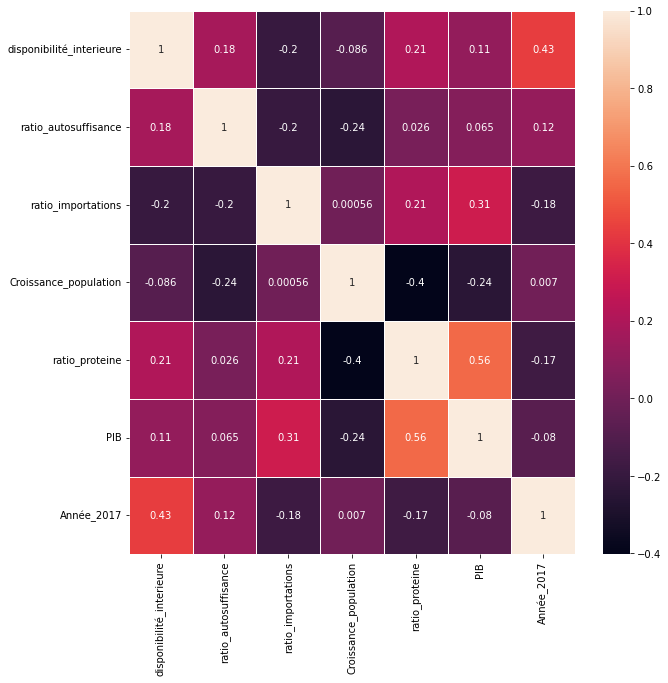

In [41]:
plt.figure(figsize=(10,10))
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DF_Analyse.corr(), annot = True,  linewidths = .5, ax = ax)

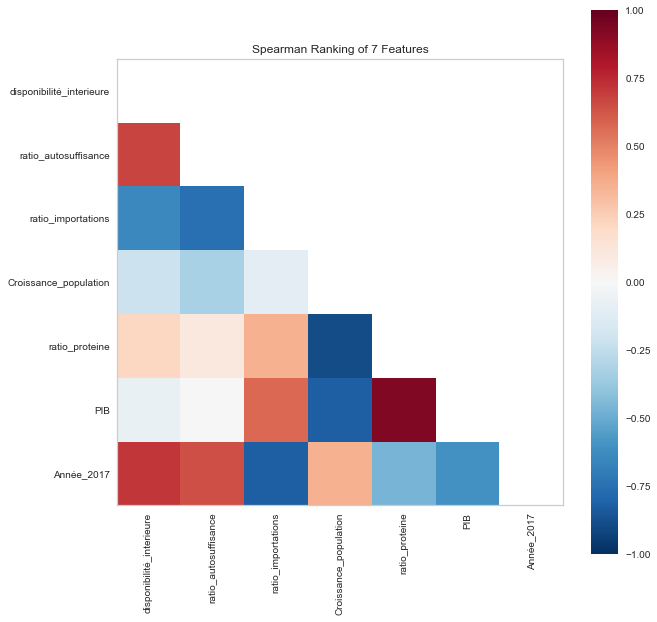

<AxesSubplot:title={'center':'Spearman Ranking of 7 Features'}>

In [42]:
from yellowbrick.features import Rank2D
plt.figure(figsize=(10,10))
visualizer = Rank2D(algorithm="spearman")
visualizer.fit_transform(DF_Analyse.corr())
visualizer.show()

## Matrice DF Analyse :

(129, 8)
       disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
count                129.000000             129.00000          129.000000   
mean                 755.961240              80.44031           38.886667   
std                 1962.389557              50.83713           49.212590   
min                    4.000000               0.00000            0.000000   
25%                   51.000000              62.50000            4.000000   
50%                  158.000000              88.46000           20.610000   
75%                  752.000000             100.00000           69.230000   
max                18345.000000             379.31000          338.430000   

       Croissance_population  ratio_proteine            PIB    Année_2017  
count             129.000000      129.000000     129.000000  1.290000e+02  
mean                4.843178       29.260853   24065.640310  4.005388e+04  
std                 5.028005       10.491462   21573.336225  1.263895

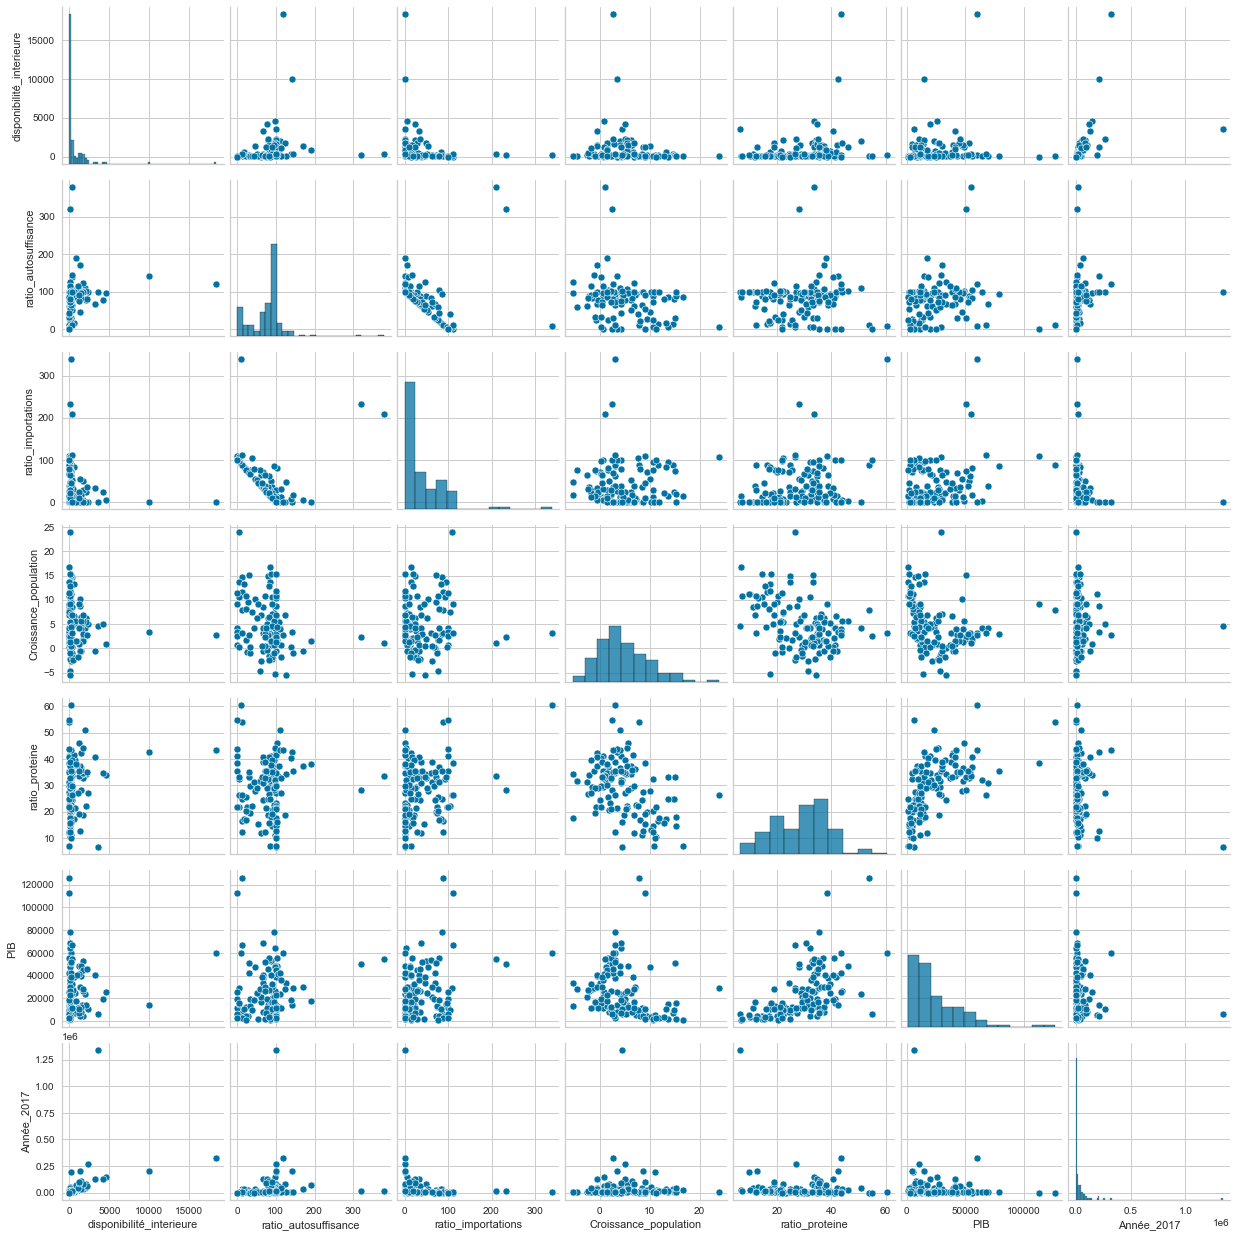

In [43]:
#dimension des données
print(DF_Analyse.shape)
#statistiques descriptives
print(DF_Analyse.describe())
# Matrice DF
sns.pairplot(DF_Analyse)

## Scatter de visualisation :

Disponibilité intérieure en gramme de protéines journaliéres totales :

In [44]:

# create a bubble chart 
fig = px.scatter(DF, x='ratio_proteine', y='disponibilité_interieure', color='Continent',size='Année_2017', size_max=60, hover_name='Zone',title="Taille des bulles = population")
fig.show() 


Ratio d'importations sur la disponibilité interieure :

In [45]:
# create a bubble chart 
fig = px.scatter(DF, x='ratio_importations', y='disponibilité_interieure', color='Continent',size='Année_2017', size_max=60, hover_name='Zone',title="Taille des bulles = population")
fig.show() 

Ratio d'importations sur le ratio d'autosuffisance :

In [46]:
# create a bubble chart 
fig = px.scatter(DF, x='ratio_autosuffisance', y='ratio_importations', color='Continent',size='Année_2017', size_max=60, hover_name='Zone',title="Taille des bulles = population")
fig.show() 

Ratio des importations sur la disponibilité intérieure par continent :

In [47]:

# create a facet plot 
fig = px.scatter(DF, x='Croissance_population', y='PIB', color='Continent', size='Année_2017', size_max=60, 
                 hover_name='Zone',facet_col='Continent', log_x=True,title="Taille des bulles = population")
fig.show()


## Dendrogrammes :

### importation des librairies :

In [48]:
# Pour dendogramme :
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

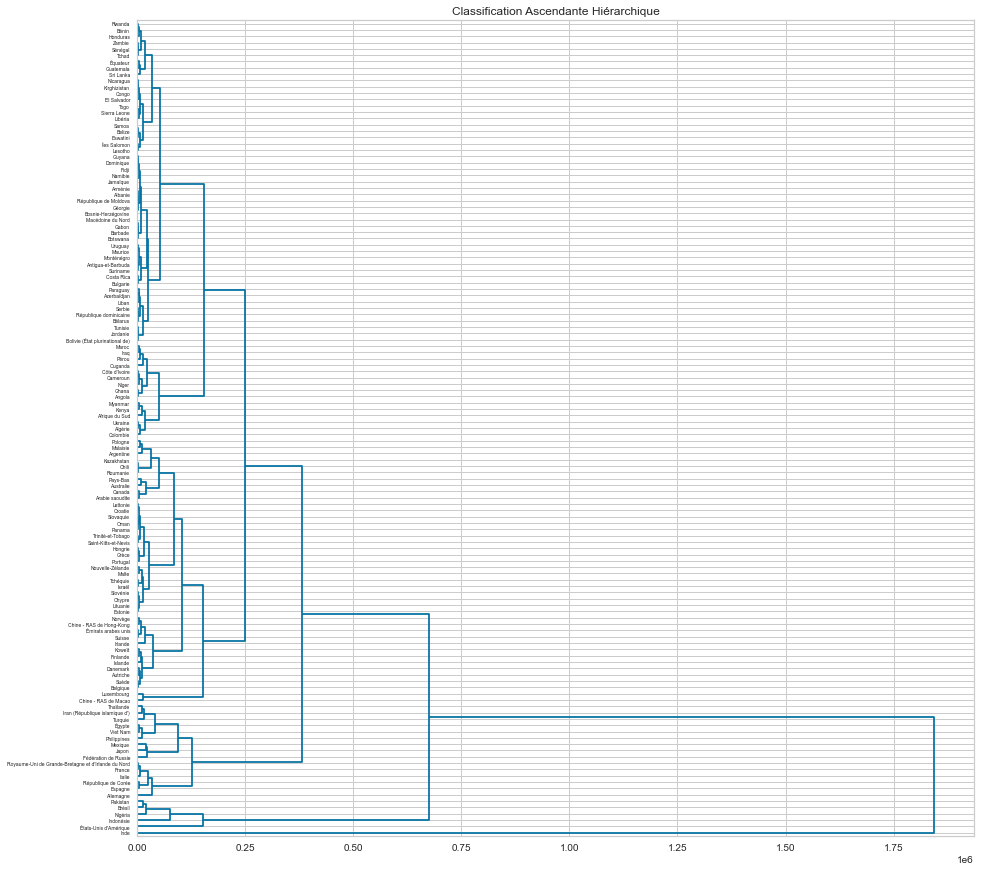

In [49]:
DF = DF.set_index('Zone')
#générer la matrice des liens
Z = linkage(DF_Analyse,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(15,15))
# Affichage du titre
plt.title("Classification Ascendante Hiérarchique")
# Creation du dendrogram
dendrogram(Z,labels=DF.index,orientation='right',color_threshold = 0)
leaf_font_size = 7
plt.show()

### Visu du dendogramme avec les classes : 

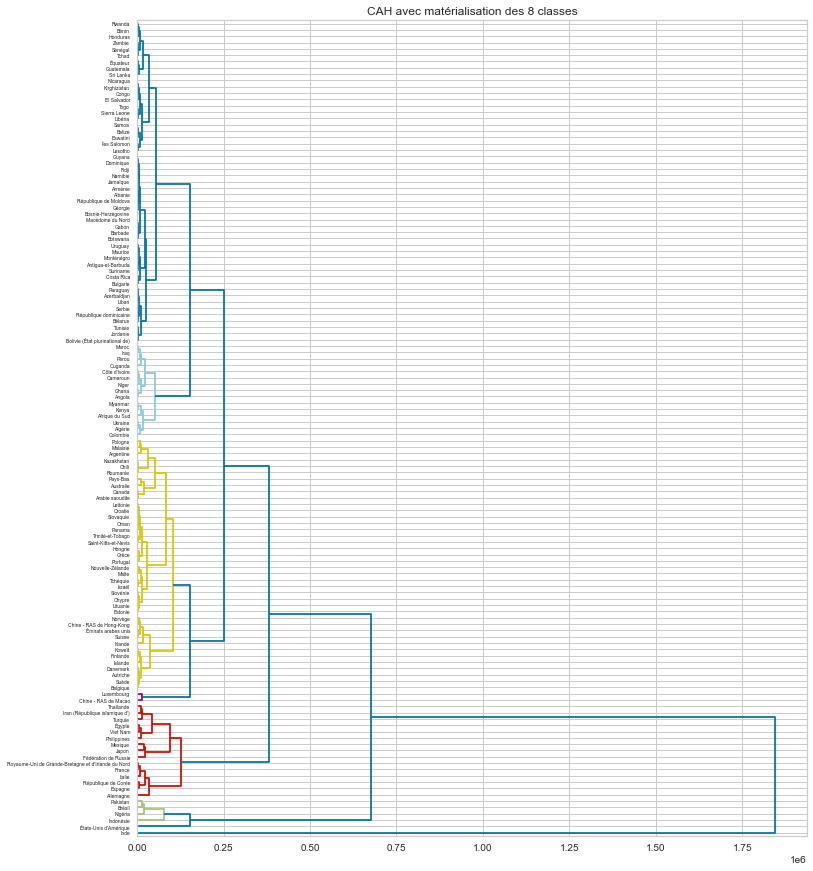

[6 7 6 3 6 7 5 5 7 5 5 7 7 5 7 7 7 7 1 7 7 7 6 5 5 5 4 5 6 7 7 5 6 5 7 7 3
 5 7 7 5 3 3 7 6 5 7 7 7 7 5 8 1 3 6 5 5 5 3 7 3 7 5 6 7 5 7 5 7 7 5 4 7 5
 5 6 7 3 7 6 7 7 6 1 5 5 5 6 1 5 7 5 3 5 5 6 5 3 7 3 7 7 5 7 7 7 5 5 7 5 7
 5 7 7 5 3 7 5 7 3 6 7 3 7 3 5 7 2 7]


Zone
1                Pakistan
1               Indonésie
1                 Nigéria
1                  Brésil
2   États-Unis d'Amérique
..                    ...
7               Guatemala
7                   Gabon
7                Paraguay
7            Îles Salomon
8                    Inde

[129 rows x 1 columns]

In [50]:
#matérialisation des 8 classes (hauteur t = 450000)
plt.figure(figsize=(12,15))
plt.title('CAH avec matérialisation des 8 classes')
dendrogram(Z,labels=DF.index,orientation='right',color_threshold = 140000)
plt.show()
#découpage à la hauteur t = 450000 ==> identifiants de 8 groupes obtenus
groupes_cah = fcluster(Z,t=140000,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
pd.DataFrame(DF.index[idg],groupes_cah[idg])

Visu des clusters :

In [51]:
for k in range (1,9):
    print(f"Cluster {k}:")
    print(" , ".join(DF.index[idg][groupes_cah[idg] == k].sort_values()))
    print(" ")

Cluster 1:
Brésil , Indonésie , Nigéria , Pakistan
 
Cluster 2:
États-Unis d'Amérique
 
Cluster 3:
Allemagne , Espagne , France , Fédération de Russie , Iran (République islamique d') , Italie , Japon , Mexique , Philippines , Royaume-Uni de Grande-Bretagne et d'Irlande du Nord , République de Corée , Thaïlande , Turquie , Viet Nam , Égypte
 
Cluster 4:
Chine - RAS de Macao , Luxembourg
 
Cluster 5:
Arabie saoudite , Argentine , Australie , Autriche , Belgique , Canada , Chili , Chine - RAS de Hong-Kong , Chypre , Croatie , Danemark , Estonie , Finlande , Grèce , Hongrie , Irlande , Islande , Israël , Kazakhstan , Koweït , Lettonie , Lituanie , Malaisie , Malte , Norvège , Nouvelle-Zélande , Oman , Panama , Pays-Bas , Pologne , Portugal , Roumanie , Saint-Kitts-et-Nevis , Slovaquie , Slovénie , Suisse , Suède , Tchéquie , Trinité-et-Tobago , Émirats arabes unis
 
Cluster 6:
Afrique du Sud , Algérie , Angola , Cameroun , Colombie , Côte d'Ivoire , Ghana , Iraq , Kenya , Maroc , Myanmar 

# <u>ACP avec StandardScaler :<u>

Ici, nous allons utiliser le sous-module decomposition, nous allons importer la fonction PCA. 

Cette fonction contiendra le résultat de l'ACP. 

### __import des librairies pour l ACP :__

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition

## __Standardisation et transformation de DF_Analyse en Z_scaled  :__

In [53]:
Z = DF_Analyse.values
std_scale = preprocessing.StandardScaler().fit(Z)
Z_scaled = std_scale.transform(Z)

In [54]:
#moyenne
print(np.mean(Z_scaled,axis=0))
#écart-type
print(np.std(Z_scaled,axis=0,ddof=0))
# Visu
Z_scaled

[ 8.60638004e-18  1.82455257e-16 -8.26212483e-17 -4.81957282e-17
  2.75404161e-16 -4.81957282e-17  4.81957282e-17  6.88510403e-18]
[1. 1. 1. 1. 1. 1. 1. 1.]


array([[ 0.69677749, -0.03416904, -0.29816866, ..., -0.52883086,
         0.13467882, -0.38169036],
       [-0.36063667, -1.08512307,  0.72668836, ..., -0.52558742,
        -0.2952352 ,  0.41344341],
       [-0.24502196,  0.37203397, -0.77857038, ..., -0.5736852 ,
         0.01060625, -1.15272916],
       ...,
       [-0.21279308,  0.38625207, -0.79325782, ..., -0.57924605,
        -0.18481945, -0.12869325],
       [ 8.99801582,  0.77033805, -0.77959034, ...,  1.67728266,
         2.26397121,  0.36525348],
       [-0.3836573 , -1.58848305,  1.24666457, ..., -0.99591357,
        -0.31309186,  0.19658874]])

## __Z_scaled :__

### Z_scaled version initial :

#### Décomposition pour Z_scaled  :

In [55]:
PCA_decomposition = decomposition.PCA(n_components = 7)
PCA_decomposition.fit(Z_scaled)

PCA(n_components=7)

L'objet pca comprend maintenant un certain nombre d'objets et de fonctions. 

Le premier objet est le tableau des variances expliquées (explained_variance_) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

#### Visualisation de la variance pour Z_scaled :

In [56]:
print(PCA_decomposition.explained_variance_ratio_)
print(PCA_decomposition.explained_variance_ratio_.sum())

[0.32310372 0.21478033 0.13270688 0.09453797 0.08504448 0.06777022
 0.04206962]
0.9600132068852187


#### Tableau visualisation des dimensions via le DF Poulet_v1:

__Creation d un tableau recapitulatif en % :__

In [57]:
Poulet_v1 = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Valeur propre" : PCA_decomposition.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cumsum variance expliquée"]
)
Poulet_v1

Dimension  Valeur propre  % variance expliquée  % cumsum variance expliquée
0      Dim1       2.605024                  32.0                         32.0
1      Dim2       1.731666                  21.0                         54.0
2      Dim3       1.069949                  13.0                         67.0
3      Dim4       0.762212                   9.0                         77.0
4      Dim5       0.685671                   9.0                         85.0
5      Dim6       0.546397                   7.0                         92.0
6      Dim7       0.339186                   4.0                         96.0

#### Graphique visualisation des dimensions :

Visu graph :

Text(0.5, 0.98, 'Variance expliquée par dimension')

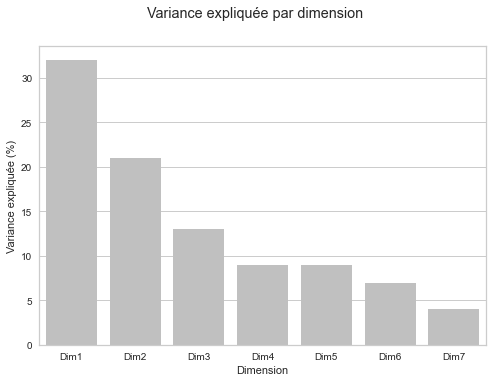

In [58]:
Poulet_graph = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = Poulet_v1)
Poulet_graph.set(ylabel = "Variance expliquée (%)")
Poulet_graph.figure.suptitle("Variance expliquée par dimension")

Au vu de mes graphiques et de mes données, ma PCA sera de 3, car je garde 63% des données, suffisant via la loi de Pareto.

### Z_scaled version final :

#### Décomposition pour Z_scaled final :

Au vu de la premiére ACP modification de n_components en 3 :

In [59]:
PCA_decomposition = decomposition.PCA(n_components = 3)
PCA_decomposition.fit(Z_scaled)

PCA(n_components=3)

#### Visualisation de la variance pour Z_scaled :

In [60]:
print(PCA_decomposition.explained_variance_ratio_)
print(PCA_decomposition.explained_variance_ratio_.sum())

[0.32310372 0.21478033 0.13270688]
0.6705909224593848


On a donc bien 63% de la variance avec 3 dimensions.

#### Tableau visualisation des dimensions via le DF Poulet:

__Creation d un tableau recapitulatif en % :__

Text(0.5, 0.98, 'Variance expliquée par dimension')

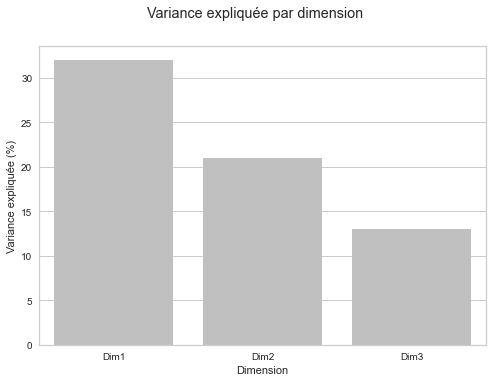

In [61]:
Poulet = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(3)], 
        "Valeur propre" : PCA_decomposition.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cumsum variance expliquée"]
)
Poulet

#
Poulet_graph = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = Poulet)
Poulet_graph.set(ylabel = "Variance expliquée (%)")
Poulet_graph.figure.suptitle("Variance expliquée par dimension")

## __Z_Projected :__

### Mise en place des données pour Z_Projected :

#### Transformation de Z_scaled en Z_projected :

In [62]:
Z_projected = PCA_decomposition.transform(Z_scaled)

#### Visu de Z_projected (array) :

In [63]:
Z_projected

array([[-4.00861066e-01,  5.40698133e-01,  3.02606915e-01],
       [ 2.13820083e-01, -9.36543469e-01, -6.75788912e-02],
       [-2.22888590e+00, -1.34783778e-01, -4.81027357e-01],
       [ 1.38843152e+00,  7.32908556e-01,  3.65458072e-01],
       [-1.22751571e+00, -1.73485551e+00,  1.58724607e+00],
       [ 1.35725798e+00, -1.37513050e+00,  9.84336455e-01],
       [-1.90687269e-01, -4.34008556e-01,  1.24836796e+00],
       [ 9.68914066e-01,  1.23127384e+00, -2.50354438e-01],
       [-4.06480014e-01, -9.65952919e-01,  1.98450052e-01],
       [ 1.67924285e+00,  7.47688445e-01, -5.19166947e-02],
       [ 1.88611479e+00, -2.24927239e-01,  6.79682540e-02],
       [-1.30635641e+00, -3.07767376e-01, -5.01282763e-01],
       [ 1.17093895e+00,  1.77672818e-01, -9.43703884e-01],
       [ 2.17121893e+00,  5.66166385e-01, -1.31478575e+00],
       [-8.90943753e-01, -2.38900950e-01, -6.27462966e-01],
       [-4.24357098e-01,  2.65272121e-01, -6.08867280e-01],
       [-4.41221758e-01,  3.60268504e-01

#### Transformation de Z_projected en DataFrame :

Transformation de Z-Projected version array en DataFrame :

In [64]:
Z_projected = pd.DataFrame(
    {
        "Composante 1" : Z_projected [:,0], 
        "Composante 2" : Z_projected [:,1],
        "Composante 3" : Z_projected [:,2],
        
    },
    columns = ["Composante 1", "Composante 2", "Composante 3"]
)
Z_projected

Composante 1  Composante 2  Composante 3
0       -0.400861      0.540698      0.302607
1        0.213820     -0.936543     -0.067579
2       -2.228886     -0.134784     -0.481027
3        1.388432      0.732909      0.365458
4       -1.227516     -1.734856      1.587246
..            ...           ...           ...
124     -2.250966      0.347355      0.160261
125      1.773639     -1.149170      1.308566
126     -0.643478      0.082329     -0.599126
127      1.303666      7.423817      4.202284
128     -0.804172     -2.061104      1.301063

[129 rows x 3 columns]

### Graph visuel pour Z_Projected :

#### Heatmap de Z_projected :

##### Import des librairies :

In [65]:
from yellowbrick.features import Rank2D

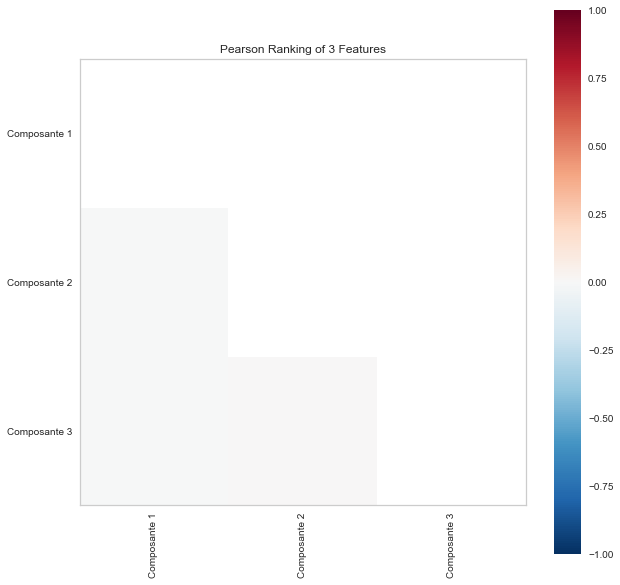

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

In [66]:
plt.figure(figsize=(10,10))
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(Z_projected)
visualizer.show()

### DF Z_projected :

#### Visu de Z_projected (DF)

Ajout des continents :

In [67]:
DF = DF.reset_index()
DF_Continent = pd.DataFrame(DF.Continent)
Z_projected = pd.concat([Z_projected, DF['Continent']], axis = 1)

In [68]:
Z_projected

Composante 1  Composante 2  Composante 3 Continent
0       -0.400861      0.540698      0.302607   Afrique
1        0.213820     -0.936543     -0.067579    Europe
2       -2.228886     -0.134784     -0.481027   Afrique
3        1.388432      0.732909      0.365458    Europe
4       -1.227516     -1.734856      1.587246   Afrique
..            ...           ...           ...       ...
124     -2.250966      0.347355      0.160261   Afrique
125      1.773639     -1.149170      1.308566      Asie
126     -0.643478      0.082329     -0.599126  Amerique
127      1.303666      7.423817      4.202284  Amerique
128     -0.804172     -2.061104      1.301063   Oceanie

[129 rows x 4 columns]

### Visu des 3 composantes :

#### Scatter plot de Z_Projected :

Représentation de la composante 1 et 2 :

In [69]:
fig =  px.scatter(Z_projected.dropna(), x= 'Composante 1', y = 'Composante 2',color = 'Continent')
fig.update_layout(width=800, height=800, title = 'Composante 1 et 2',
                  xaxis=dict(title='1ere composante'),
                  yaxis=dict(title='2eme composante')
                           )

Représentation graphique de la composante 1 et 3 :

In [70]:
fig =  px.scatter(Z_projected.dropna(), x= 'Composante 1', y = 'Composante 3',color = 'Continent')
fig.update_layout(width=800, height=800, title = 'Composante 1 et 3',
                  xaxis=dict(title='1ere composante'),
                  yaxis=dict(title='3eme composante')
                           )

Représentation graphique de la composante 2 et 3 :

In [71]:
fig =  px.scatter(Z_projected.dropna(), x= 'Composante 2', y = 'Composante 3',color = 'Continent')
fig.update_layout(width=800, height=800, title = 'composante 2 et 3',
                  xaxis=dict(title='2eme composante'),
                  yaxis=dict(title='3eme composante')
                           )

#### Cercle de corrélation  de Z_Projected :

<u>cercle de corrélation sur la variance avec la composante 1 et la composante 2  :<u>

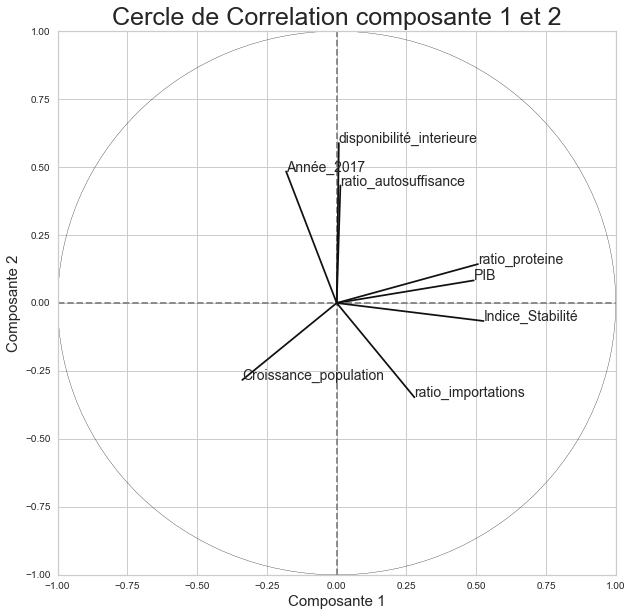

In [72]:
# Visu du cercle de corrélation % variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[0, :],Pca_test[1, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, DF_Analyse.columns[n], fontsize='14')

    
plt.xlabel('Composante 1', fontsize = 15)
plt.ylabel('Composante 2', fontsize = 15)
plt.title(' Cercle de Correlation composante 1 et 2 ', fontsize = 25)
plt.grid(True)
plt.show()

<u>cercle de corrélation avec la composante 1 et la composante 3  :<u>

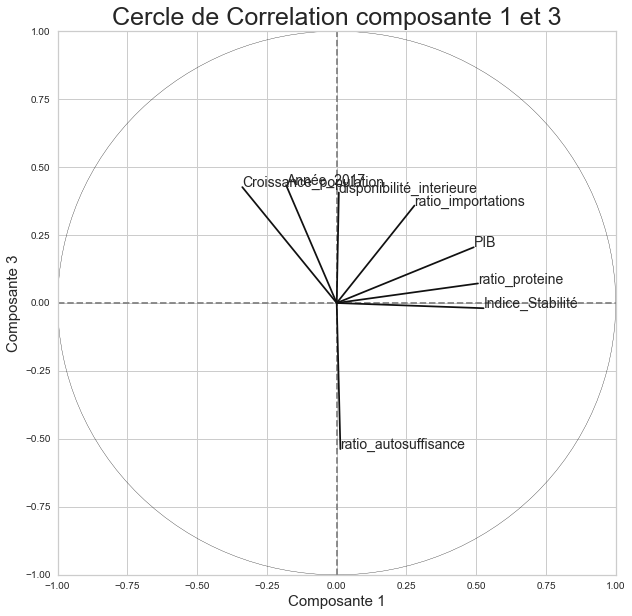

In [73]:
# Visu du cercle de corrélation % variance expliquée et du % cumsum variance expliquée :
Pca_test = PCA_decomposition.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[0, :],Pca_test[2, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, DF_Analyse.columns[n], fontsize='14')

    
plt.xlabel('Composante 1', fontsize = 15)
plt.ylabel('Composante 3', fontsize = 15)
plt.title(' Cercle de Correlation composante 1 et 3 ', fontsize = 25)
plt.grid(True)
plt.show()

<u>Cercle de corrélation avec la composante 2 et la composante 3  :<u>

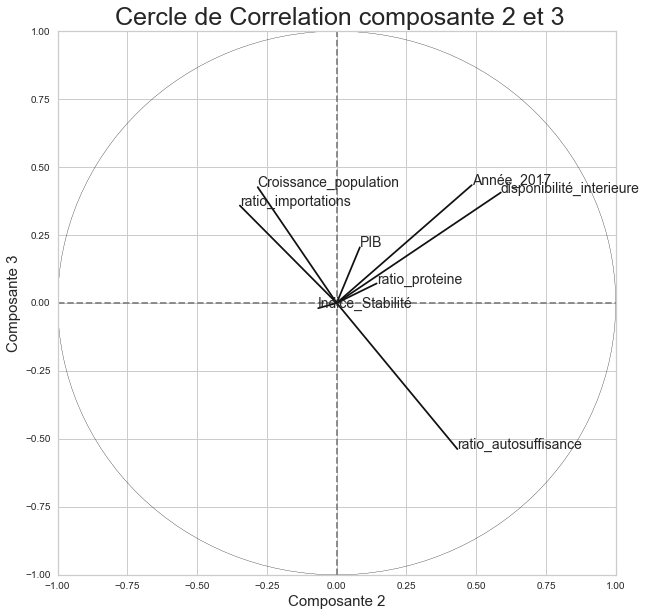

In [74]:
# Visu du cercle de corrélation % cumsum variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[1, :],Pca_test[2, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, DF_Analyse.columns[n], fontsize='14')

    
plt.xlabel('Composante 2', fontsize = 15)
plt.ylabel('Composante 3', fontsize = 15)
plt.title(' Cercle de Correlation composante 2 et 3', fontsize = 25)
plt.grid(True)
plt.show()

# ACP avec MinMaxScaler :

### Import des librairies :

In [75]:
from sklearn.preprocessing import MinMaxScaler

## __Standardisation et transformation de DF_Analyse en Z_scaled_v2  :__

In [76]:
data = DF_Analyse
scaler = MinMaxScaler()
scaler.fit(DF_Analyse)
MinMaxScaler()
scaler.data_max_
Z_Scaled_v2 = scaler.transform(data)
Z_Scaled_v2

array([[1.15260891e-01, 2.07508370e-01, 7.17135006e-02, ...,
        9.22858128e-02, 4.25494235e-02, 5.32500000e-01],
       [2.56256475e-03, 6.72009702e-02, 2.20163697e-01, ...,
        9.28433222e-02, 2.11569674e-03, 6.97500000e-01],
       [1.48846846e-02, 2.61738420e-01, 2.12747097e-03, ...,
        8.45758649e-02, 3.08803078e-02, 3.72500000e-01],
       ...,
       [1.83196118e-02, 2.63636603e-01, 0.00000000e+00, ...,
        8.36200201e-02, 1.25003786e-02, 5.85000000e-01],
       [1.00000000e+00, 3.14913923e-01, 1.97972993e-03, ...,
        4.71491430e-01, 2.42810925e-01, 6.87500000e-01],
       [1.09045308e-04, 0.00000000e+00, 2.95482079e-01, ...,
        1.19996513e-02, 4.36264162e-04, 6.52500000e-01]])

## Z_scaled_v2 version initial :

#### Décomposition pour Z_scaled_v2  :

In [77]:
PCA_decomposition_v2 = decomposition.PCA(n_components = 7)
PCA_decomposition_v2.fit(Z_Scaled_v2)

PCA(n_components=7)

#### Visualisation de la variance pour Z_scaled_v2 :

In [78]:
print(PCA_decomposition_v2.explained_variance_ratio_)
print(PCA_decomposition_v2.explained_variance_ratio_.sum())

[0.44925973 0.15634742 0.10400195 0.08251891 0.07678232 0.05941776
 0.04820864]
0.9765367324162919


#### Tableau visualisation des dimensions via le DF Chicken_v1 :

In [79]:
Chicken_v1 = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Valeur propre" : PCA_decomposition_v2.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition_v2.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition_v2.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cumsum variance expliquée"]
)
Chicken_v1

Dimension  Valeur propre  % variance expliquée  % cumsum variance expliquée
0      Dim1       0.089630                  45.0                         45.0
1      Dim2       0.031192                  16.0                         61.0
2      Dim3       0.020749                  10.0                         71.0
3      Dim4       0.016463                   8.0                         79.0
4      Dim5       0.015318                   8.0                         87.0
5      Dim6       0.011854                   6.0                         93.0
6      Dim7       0.009618                   5.0                         98.0

#### Visu graph pour Chicken :

Text(0.5, 0.98, 'Variance expliquée par dimension')

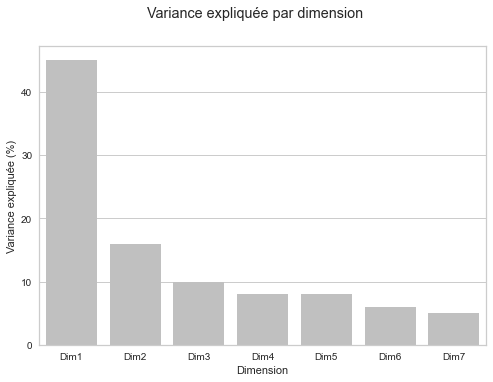

In [80]:
Chicken_graph = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = Chicken_v1)
Chicken_graph.set(ylabel = "Variance expliquée (%)")
Chicken_graph.figure.suptitle("Variance expliquée par dimension")

### Z_scaled_v2 version final :

#### Décomposition pour Z_Scaled_v2 :

In [81]:
PCA_decomposition_v2 = decomposition.PCA(n_components = 3)
PCA_decomposition_v2.fit(Z_Scaled_v2)

PCA(n_components=3)

#### Visualisation de la variance pour Z_Scaled_v2 :

In [82]:
print(PCA_decomposition_v2.explained_variance_ratio_)
print(PCA_decomposition_v2.explained_variance_ratio_.sum())

[0.44925973 0.15634742 0.10400195]
0.7096090961084602


#### Visu graph pour Chicken_v2 :

Text(0.5, 0.98, 'Variance expliquée par dimension')

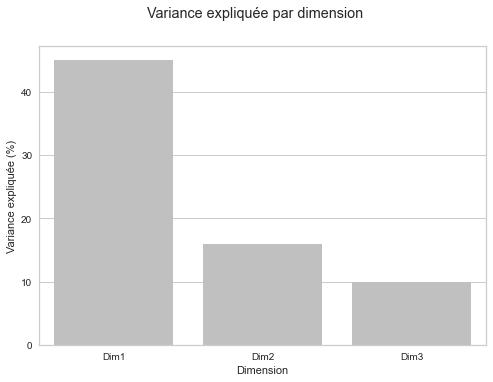

In [83]:
Chicken_v2 = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(3)], 
        "Valeur propre" : PCA_decomposition_v2.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition_v2.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition_v2.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cumsum variance expliquée"]
)
Chicken_v2 

#
Chicken_graph_v2 = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = Chicken_v2)
Chicken_graph_v2.set(ylabel = "Variance expliquée (%)")
Chicken_graph_v2.figure.suptitle("Variance expliquée par dimension")

## __Z_Projected_v2 :__

### Mise en place des données pour Z_Projected_v2 :

#### Transformation de Z_scaled_v2 en Z_projected_v2 :

##### Visu de Z_projected_v2 (array) :

In [84]:
Z_projected_v2 = PCA_decomposition_v2.transform(Z_Scaled_v2)
Z_projected_v2

array([[-5.84629127e-02, -5.26785141e-02,  9.35131242e-02],
       [ 1.55384331e-02,  4.72265458e-02, -2.70714248e-01],
       [-4.29627209e-01, -1.32329387e-02, -2.13680191e-02],
       [ 2.60256355e-01, -2.79377363e-02,  4.52412588e-02],
       [-2.44116553e-01,  3.38555821e-01,  7.43477458e-02],
       [ 2.49239517e-01,  1.96501100e-01, -5.96992149e-02],
       [-7.33092427e-02,  1.62264129e-01,  2.19814548e-01],
       [ 2.25968110e-01, -1.73425310e-01,  1.88214671e-01],
       [-1.27266768e-01,  3.94851312e-02, -1.07656003e-01],
       [ 3.59619698e-01, -4.48673199e-02,  1.69812175e-01],
       [ 3.48782217e-01,  7.25383931e-02, -7.64570437e-03],
       [-2.70539169e-01, -3.47129717e-02, -5.29913897e-02],
       [ 2.64778858e-01, -1.10879596e-01, -1.12161573e-01],
       [ 2.82296709e-01, -7.16400057e-03,  9.95562228e-03],
       [-1.37738380e-01, -1.38789463e-05, -1.12240471e-02],
       [-5.54230427e-02, -9.89718210e-02,  7.06026959e-02],
       [-1.14065491e-01, -2.49490863e-01

#### Transformation de Z_projected_v2 en DataFrame :

Transformation de Z-Projected_v2 version array en DataFrame :

In [85]:
Z_projected_v2 = pd.DataFrame(
    {
        "Composante 1" : Z_projected_v2 [:,0], 
        "Composante 2" : Z_projected_v2 [:,1],
        "Composante 3" : Z_projected_v2 [:,2],
        
    },
    columns = ["Composante 1", "Composante 2", "Composante 3"]
)
Z_projected_v2

Composante 1  Composante 2  Composante 3
0       -0.058463     -0.052679      0.093513
1        0.015538      0.047227     -0.270714
2       -0.429627     -0.013233     -0.021368
3        0.260256     -0.027938      0.045241
4       -0.244117      0.338556      0.074348
..            ...           ...           ...
124     -0.433926     -0.044086      0.121117
125      0.270526      0.245356     -0.012195
126     -0.095729     -0.050825      0.010142
127      0.329597     -0.414622      0.630828
128     -0.165949      0.344114     -0.091010

[129 rows x 3 columns]

### DF Z_projected :

#### Visu de Z_projected (DF)

Ajout des continents :

In [86]:
DF = DF.reset_index()
DF_Continent = pd.DataFrame(DF.Continent)
Z_projected_v2 = pd.concat([Z_projected_v2, DF['Continent']], axis = 1)
Z_projected_v2

Composante 1  Composante 2  Composante 3 Continent
0       -0.058463     -0.052679      0.093513   Afrique
1        0.015538      0.047227     -0.270714    Europe
2       -0.429627     -0.013233     -0.021368   Afrique
3        0.260256     -0.027938      0.045241    Europe
4       -0.244117      0.338556      0.074348   Afrique
..            ...           ...           ...       ...
124     -0.433926     -0.044086      0.121117   Afrique
125      0.270526      0.245356     -0.012195      Asie
126     -0.095729     -0.050825      0.010142  Amerique
127      0.329597     -0.414622      0.630828  Amerique
128     -0.165949      0.344114     -0.091010   Oceanie

[129 rows x 4 columns]

### Visu des 3 composantes :

#### Scatter plot de Z_Projected :

Représentation de la composante 1 et 2 :

In [87]:
fig =  px.scatter(Z_projected_v2.dropna(), x= 'Composante 1', y = 'Composante 2',color = 'Continent')
fig.update_layout(width=800, height=800, title = 'Composante 1 et 2',
                  xaxis=dict(title='1ere composante à 37%'),
                  yaxis=dict(title='2eme composante à 19%')
                           )

Représentation de la composante 1 et 3 :

In [88]:
fig =  px.scatter(Z_projected_v2.dropna(), x= 'Composante 1', y = 'Composante 3',color = 'Continent')
fig.update_layout(width=800, height=800, title = 'Composante 1 et 3',
                  xaxis=dict(title='1ere composante à 37%'),
                  yaxis=dict(title='3eme composante à 19%')
                           )

Représentation de la composante 2 et 3 :

In [89]:
fig =  px.scatter(Z_projected_v2.dropna(), x= 'Composante 2', y = 'Composante 3',color = 'Continent')
fig.update_layout(width=800, height=800, title = 'Composante 2 et 3',
                  xaxis=dict(title='2ere composante à 37%'),
                  yaxis=dict(title='3eme composante à 19%')
                           )

#### Cercle de corrélation  de Z_Projected :

<u>cercle de corrélation sur la variance avec la composante 1 et la composante 2  :<u>

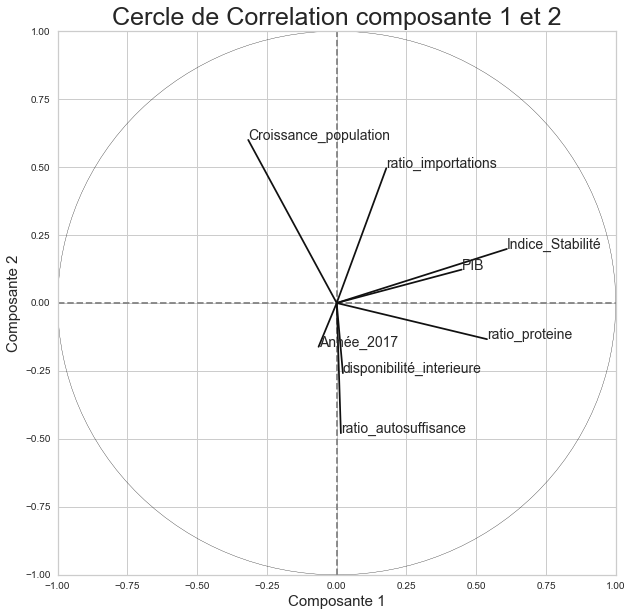

In [90]:
# Visu du cercle de corrélation % variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition_v2.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[0, :],Pca_test[1, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, DF_Analyse.columns[n], fontsize='14')

    
plt.xlabel('Composante 1', fontsize = 15)
plt.ylabel('Composante 2', fontsize = 15)
plt.title(' Cercle de Correlation composante 1 et 2 ', fontsize = 25)
plt.grid(True)
plt.show()

<u>cercle de corrélation sur la variance avec la composante 1 et la composante 3  :<u>

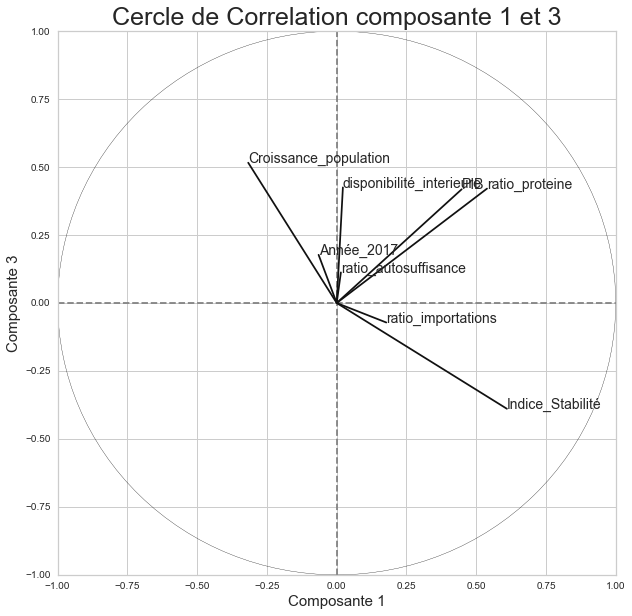

In [91]:
# Visu du cercle de corrélation % variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition_v2.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[0, :],Pca_test[2, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, DF_Analyse.columns[n], fontsize='14')

    
plt.xlabel('Composante 1', fontsize = 15)
plt.ylabel('Composante 3', fontsize = 15)
plt.title(' Cercle de Correlation composante 1 et 3 ', fontsize = 25)
plt.grid(True)
plt.show()

<u>cercle de corrélation sur la variance avec la composante 2 et la composante 3  :<u>

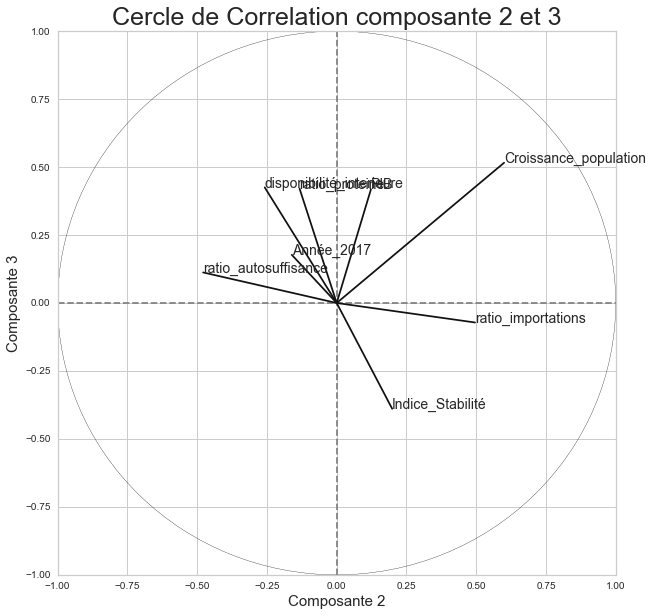

In [92]:
# Visu du cercle de corrélation % variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition_v2.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (x, y) in enumerate(zip(Pca_test[1, :],Pca_test[2, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom de la perf
    plt.text(x, y, DF_Analyse.columns[n], fontsize='14')

    
plt.xlabel('Composante 2', fontsize = 15)
plt.ylabel('Composante 3', fontsize = 15)
plt.title(' Cercle de Correlation composante 2 et 3 ', fontsize = 25)
plt.grid(True)
plt.show()

# <u>K-Means avec StandardScaler :<u>

### __Affichage des clusters__ :

#### Affinage et transformation du DF_Analyse en DF_Scaled par StandardScaler :

In [93]:
std_scale = preprocessing.StandardScaler().fit(DF_Analyse)
DF_Scaled = std_scale.transform(DF_Analyse)
DF_Scaled

array([[ 0.69677749, -0.03416904, -0.29816866, ..., -0.52883086,
         0.13467882, -0.38169036],
       [-0.36063667, -1.08512307,  0.72668836, ..., -0.52558742,
        -0.2952352 ,  0.41344341],
       [-0.24502196,  0.37203397, -0.77857038, ..., -0.5736852 ,
         0.01060625, -1.15272916],
       ...,
       [-0.21279308,  0.38625207, -0.79325782, ..., -0.57924605,
        -0.18481945, -0.12869325],
       [ 8.99801582,  0.77033805, -0.77959034, ...,  1.67728266,
         2.26397121,  0.36525348],
       [-0.3836573 , -1.58848305,  1.24666457, ..., -0.99591357,
        -0.31309186,  0.19658874]])

### Méthode du coude :

Pour visualiser le nombre de clusters optimum, nous allons utiliser la methode du ' Elbow ' :

#### Méthode du coude par StandardScaler :

In [ ]:
def kmeans_data(data):


    # fit and transform data :
    std_scale = preprocessing.StandardScaler().fit(data)
    tf_scaled = std_scale.transform(data)
    # stock inertia
    inerties = []
    # Loop
    for k in range(1, 10):  # possibilité to swap it to change score

        # Pour chaque k on ajuste
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(tf_scaled)

        # On stock l inertie qui corresponds
        inerties.append(kmeans.inertia_)
    
    return data,inerties

In [ ]:
def kmeans_visu(data):
    
    # Visu du graph
    fig = plt.figure(figsize=(12,8)) # possibilité to change for the size
    
    plt.plot(range(1,10), data) # create the size with the range
 
    plt.grid(True) # because we like grid
    
    plt.title("Elbow Visualisation :")
    plt.xlabel("Clusters")
    plt.ylabel("Inerties")
    # Visu de la figure
    plt.show()

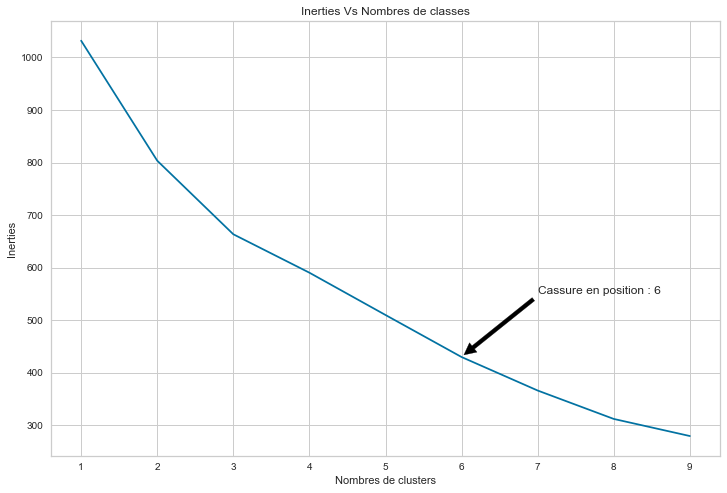

Le nombre de clusters est donc de 6 au niveau du coude.


In [94]:
# On stocke les inerties
inerties = []

# Boucle pour tester les possibilitees
for k in range (1,10) :
    
    # Pour chaque k on ajuste
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(Z_scaled)
    
    # On stock l inertie qui corresponds
    inerties.append(kmeans.inertia_)

# Visu du graph
fig = plt.figure(figsize=(12,8))
plt.plot(range(1,10), inerties)
plt.grid(True)
plt.title("Inerties Vs Nombres de classes")
plt.xlabel("Nombres de clusters")
plt.ylabel("Inerties")

# Visu 

plt.annotate("Cassure en position : 6",
            xy=(6, 430),
            xytext=(7, 550), 
            arrowprops={'facecolor':'black', 'shrink': 0.03},fontsize = 12
            )

# Visu de la figure
plt.show()

print('Le nombre de clusters est donc de 6 au niveau du coude.')

### Visu des clusters :

In [95]:
# Appliquer la classification K-Means :

x = Z_scaled  # Mettre Z_Projected pour graph
kmeans = KMeans(n_clusters = 6,init = 'k-means++')

y_kmeans = kmeans.fit_predict(x)

### Visu des centroids :

In [96]:
Centroides = kmeans.cluster_centers_
Centroides = pd.DataFrame(Centroides,columns= DF_Analyse.columns)
Centroides

disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
0                 -0.102778              0.206642           -0.568723   
1                 -0.022247              0.249174           -0.306668   
2                  6.858632              0.995754           -0.786118   
3                 -0.314930             -1.183503            0.920112   
4                 -0.313828              1.090410            2.827570   
5                  1.424741              0.388424           -0.793258   

   Croissance_population  ratio_proteine       PIB  Année_2017  \
0               0.700339       -0.896774 -0.737818    0.040886   
1              -0.626100        0.551010  0.340706   -0.122672   
2              -0.356032        1.320402  0.616649    1.798315   
3               0.426026       -0.223290 -0.317572   -0.263632   
4              -0.087487        1.186759  2.622467   -0.262921   
5              -0.064526       -2.182707 -0.832160   10.314829   

   Indice_Stabilité  
0         -1.046581  
1          0.518489  
2         -0.092551  
3          0.131718  
4          1.148340  
5         -0.959969

### DF pour la visu des graph 3D :

##### Données des pays :

In [97]:
Cluster_1 = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
Cluster_2 = pd.DataFrame(Z_projected.dropna(),columns=['Composante 1','Composante 2', 'Composante 3'])
Cluster = pd.concat([Cluster_1 ,Cluster_2],axis = 1)
Cluster

Cluster  Composante 1  Composante 2  Composante 3
0          1     -0.400861      0.540698      0.302607
1          3      0.213820     -0.936543     -0.067579
2          0     -2.228886     -0.134784     -0.481027
3          1      1.388432      0.732909      0.365458
4          3     -1.227516     -1.734856      1.587246
..       ...           ...           ...           ...
124        0     -2.250966      0.347355      0.160261
125        3      1.773639     -1.149170      1.308566
126        0     -0.643478      0.082329     -0.599126
127        2      1.303666      7.423817      4.202284
128        3     -0.804172     -2.061104      1.301063

[129 rows x 4 columns]

##### Données des centroides :

In [98]:
Centroides_1 = pd.DataFrame(kmeans.labels_,columns=['Centroides'])
Centroides_2 = pd.DataFrame(Z_projected.dropna(),columns=['Centroides_1','Centroides_2', 'Centroides_3'])
Centroides_final = pd.concat([Cluster_1 ,Cluster_2],axis = 1)
Centroides_final

Cluster  Composante 1  Composante 2  Composante 3
0          1     -0.400861      0.540698      0.302607
1          3      0.213820     -0.936543     -0.067579
2          0     -2.228886     -0.134784     -0.481027
3          1      1.388432      0.732909      0.365458
4          3     -1.227516     -1.734856      1.587246
..       ...           ...           ...           ...
124        0     -2.250966      0.347355      0.160261
125        3      1.773639     -1.149170      1.308566
126        0     -0.643478      0.082329     -0.599126
127        2      1.303666      7.423817      4.202284
128        3     -0.804172     -2.061104      1.301063

[129 rows x 4 columns]

Pour le calcul des données sur le graph 3D :

In [99]:
DF_graph_cluster = Z_projected[['Composante 1','Composante 2','Composante 3']]
DF_graph_cluster 

Composante 1  Composante 2  Composante 3
0       -0.400861      0.540698      0.302607
1        0.213820     -0.936543     -0.067579
2       -2.228886     -0.134784     -0.481027
3        1.388432      0.732909      0.365458
4       -1.227516     -1.734856      1.587246
..            ...           ...           ...
124     -2.250966      0.347355      0.160261
125      1.773639     -1.149170      1.308566
126     -0.643478      0.082329     -0.599126
127      1.303666      7.423817      4.202284
128     -0.804172     -2.061104      1.301063

[129 rows x 3 columns]

Pour le calcul des centroides dans le graph 3D :

Composante 1  Composante 2  Composante 3
Cluster                                          
0.0         -1.768296     -0.072583     -0.236121
1.0          0.871074      0.391902     -0.473506
2.0          0.563762      5.956411      2.822132
3.0         -0.057808     -1.331891      0.821545
4.0          3.370733     -0.485222      0.749993
5.0         -4.073208      5.974852      4.221921

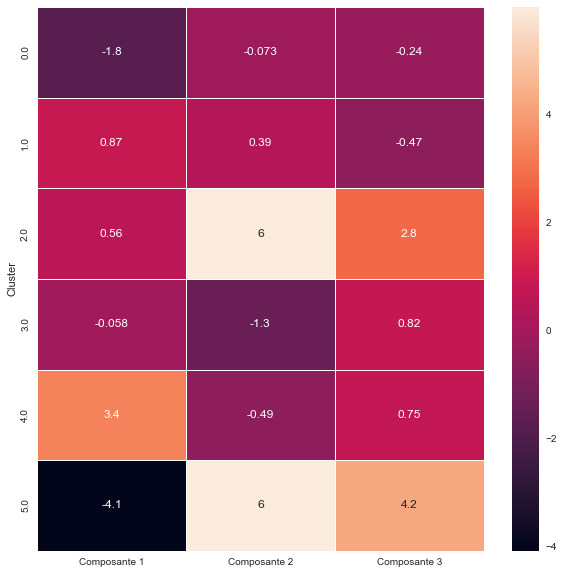

In [100]:
DF_Continent.reset_index()
DF_Cluster = pd.concat([Cluster, Continent.Zone], axis = 1)

DF_Cluster_1 = DF_Cluster.groupby('Cluster').mean()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DF_Cluster_1, annot = True, linewidths = .5, ax = ax)
DF_Cluster_1

Scatterplot 3D :

In [101]:
import plotly.offline as pyoff

Cluster.head()
scatter = dict(
    mode = "markers",
    name = "clusters",
    type = "scatter3d",
    x = DF_graph_cluster['Composante 1'], y = DF_graph_cluster['Composante 2'], z = DF_graph_cluster['Composante 3'],
    marker = dict( size=5, color=Cluster.Cluster )
)
clusters = dict(
    mode = 'markers',
    name = "centroides",
    type = "scatter3d",
    x = DF_Cluster_1['Composante 1'], y = DF_Cluster_1['Composante 2'], z = DF_Cluster_1['Composante 3'],
    marker = dict(size=15, color = 'rgb(228,26,28)', symbol='cross')
)
layout = dict(
    title = 'clusters avec centroides',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),  
    )
)
fig = dict( data=[scatter, clusters], layout=layout )

pyoff.iplot(fig, filename='clusters avec centroides')

Heatmap des centroides :

disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
0                 -0.526958             -0.113466           -0.600640   
1                 -0.495702             -0.056360           -0.399928   
2                  2.174922              0.946047           -0.767147   
3                 -0.609298             -1.979965            0.539686   
4                 -0.608871              1.073138            2.000644   
5                  0.065907              0.130606           -0.772616   

   Croissance_population  ratio_proteine       PIB  Année_2017  \
0               1.567246       -0.696464 -0.870583   -0.490774   
1              -1.395626        0.481481  0.050074   -0.533549   
2              -0.792374        1.107473  0.285627   -0.031161   
3               0.954514       -0.148505 -0.511849   -0.570413   
4              -0.192524        0.998738  1.997846   -0.570227   
5              -0.141236       -1.742724 -0.951115    2.196125   

   Indice_Stabilité  
0         -1.283745  
1          0.732486  
2         -0.054698  
3          0.234220  
4          1.543903  
5         -1.172166

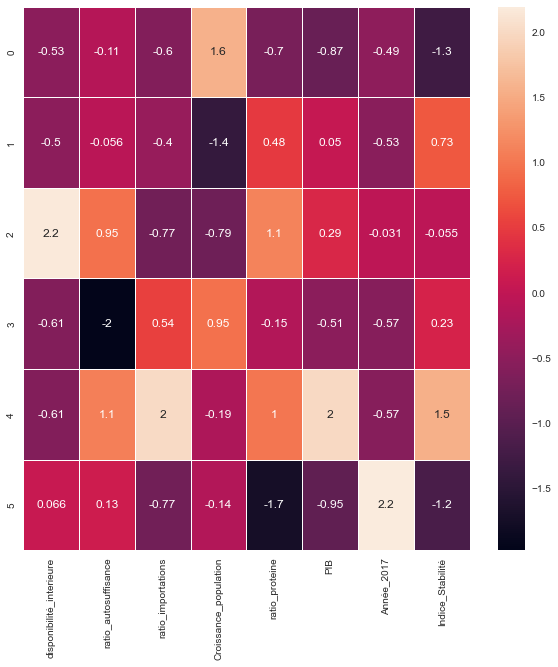

In [102]:
DF_GS = preprocessing.StandardScaler().fit_transform(Centroides)
DF_GS = pd.DataFrame(DF_GS, columns = Centroides.columns)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DF_GS, annot = True, linewidths = .5, ax = ax)
DF_GS

In [103]:
DF_GS = Centroides_final.merge(DF,how='left',left_index=True,right_index=True)
DF_GS

Cluster  Composante 1  Composante 2  Composante 3  index  \
0          1     -0.400861      0.540698      0.302607      0   
1          3      0.213820     -0.936543     -0.067579      1   
2          0     -2.228886     -0.134784     -0.481027      2   
3          1      1.388432      0.732909      0.365458      3   
4          3     -1.227516     -1.734856      1.587246      4   
..       ...           ...           ...           ...    ...   
124        0     -2.250966      0.347355      0.160261    124   
125        3      1.773639     -1.149170      1.308566    125   
126        0     -0.643478      0.082329     -0.599126    126   
127        2      1.303666      7.423817      4.202284    127   
128        3     -0.804172     -2.061104      1.301063    128   

                      Zone  disponibilité_interieure  ratio_autosuffisance  \
0           Afrique du Sud                    2118.0                 78.71   
1                  Albanie                      51.0                 25.49   
2                  Algérie                     277.0                 99.28   
3                Allemagne                    1710.0                 88.54   
4                   Angola                     319.0                 13.17   
..                     ...                       ...                   ...   
124                 Égypte                    1227.0                 91.12   
125    Émirats arabes unis                     387.0                 12.40   
126               Équateur                     340.0                100.00   
127  États-Unis d'Amérique                   18345.0                119.45   
128           Îles Salomon                       6.0                  0.00   

     ratio_importations Continent  Croissance_population  ratio_proteine  \
0                 24.27   Afrique                   6.19           34.49   
1                 74.51    Europe                  -0.68           21.88   
2                  0.72   Afrique                   8.52           11.18   
3                 49.24    Europe                   1.83           32.78   
4                 86.83   Afrique                  14.61           24.72   
..                  ...       ...                    ...             ...   
124                8.96   Afrique                   9.09           19.04   
125              111.89      Asie                   3.15           26.46   
126                0.00  Amerique                   6.86           29.86   
127                0.67  Amerique                   2.74           43.59   
128              100.00   Oceanie                  11.32           21.81   

         PIB  Année_2017 Indice_Stabilité  
0    12701.3   57009.756            -0.28  
1    12771.0    2884.169             0.38  
2    11737.4   41389.189            -0.92  
3    52952.9   82658.409             0.59  
4     7310.9   29816.766            -0.33  
..       ...         ...              ...  
124  11014.5   96442.591            -1.42  
125  67183.6    9487.203             0.62  
126  11617.9   16785.361            -0.07  
127  60109.7  325084.756             0.34  
128   2663.9     636.039              0.2  

[129 rows x 15 columns]

Résultat d'Analyse :

In [104]:
(DF_GS
        .query('Cluster == 4')
        .sort_values(by = 'PIB',ascending = False)
        .head(10)
        .sort_values(by= 'ratio_importations', ascending = False)
)

Cluster  Composante 1  Composante 2  Composante 3  index  \
25        4      4.688019     -2.399638      3.122935     25   
13        4      2.171219      0.566166     -1.314786     13   
91        4      2.808643      1.435764     -2.116485     91   
71        4      3.432032     -1.443660      2.320570     71   
26        4      4.529136     -0.858089      2.172486     26   
55        4      2.595350     -0.211874      0.315240     55   

                        Zone  disponibilité_interieure  ratio_autosuffisance  \
25  Chine - RAS de Hong-Kong                     268.0                  8.96   
13                  Belgique                     145.0                319.31   
91                  Pays-Bas                     290.0                379.31   
71                Luxembourg                      10.0                  0.00   
26      Chine - RAS de Macao                      26.0                 11.54   
55                   Irlande                     116.0                 94.83   

    ratio_importations Continent  Croissance_population  ratio_proteine  \
25              338.43      Asie                   3.07           60.59   
13              233.10    Europe                   2.38           28.17   
91              209.66    Europe                   1.06           33.46   
71              110.00    Europe                   9.10           38.46   
26               88.46      Asie                   7.83           53.94   
55               85.34    Europe                   2.99           35.36   

         PIB  Année_2017 Indice_Stabilité  
25   59849.2    7306.322             0.83  
13   50442.3   11419.748             0.43  
91   55088.6   17021.347             0.92  
71  112308.0     591.910             1.33  
26  126184.0     622.585             1.43  
55   78655.6    4753.279                1

# K-means avec MinMaxScaler :

### __Affichage des clusters__ :

#### Affinage et transformation du DF_Analyse en DF_Scaled_v2 par StandardScaler :

In [105]:
data = DF_Analyse
scaler = MinMaxScaler()
scaler.fit(DF_Analyse)
MinMaxScaler()
scaler.data_max_
DF_Scaled_2 = scaler.transform(data)
DF_Scaled_2

array([[1.15260891e-01, 2.07508370e-01, 7.17135006e-02, ...,
        9.22858128e-02, 4.25494235e-02, 5.32500000e-01],
       [2.56256475e-03, 6.72009702e-02, 2.20163697e-01, ...,
        9.28433222e-02, 2.11569674e-03, 6.97500000e-01],
       [1.48846846e-02, 2.61738420e-01, 2.12747097e-03, ...,
        8.45758649e-02, 3.08803078e-02, 3.72500000e-01],
       ...,
       [1.83196118e-02, 2.63636603e-01, 0.00000000e+00, ...,
        8.36200201e-02, 1.25003786e-02, 5.85000000e-01],
       [1.00000000e+00, 3.14913923e-01, 1.97972993e-03, ...,
        4.71491430e-01, 2.42810925e-01, 6.87500000e-01],
       [1.09045308e-04, 0.00000000e+00, 2.95482079e-01, ...,
        1.19996513e-02, 4.36264162e-04, 6.52500000e-01]])

#### Méthode du Elbow par MinMaxScaler :

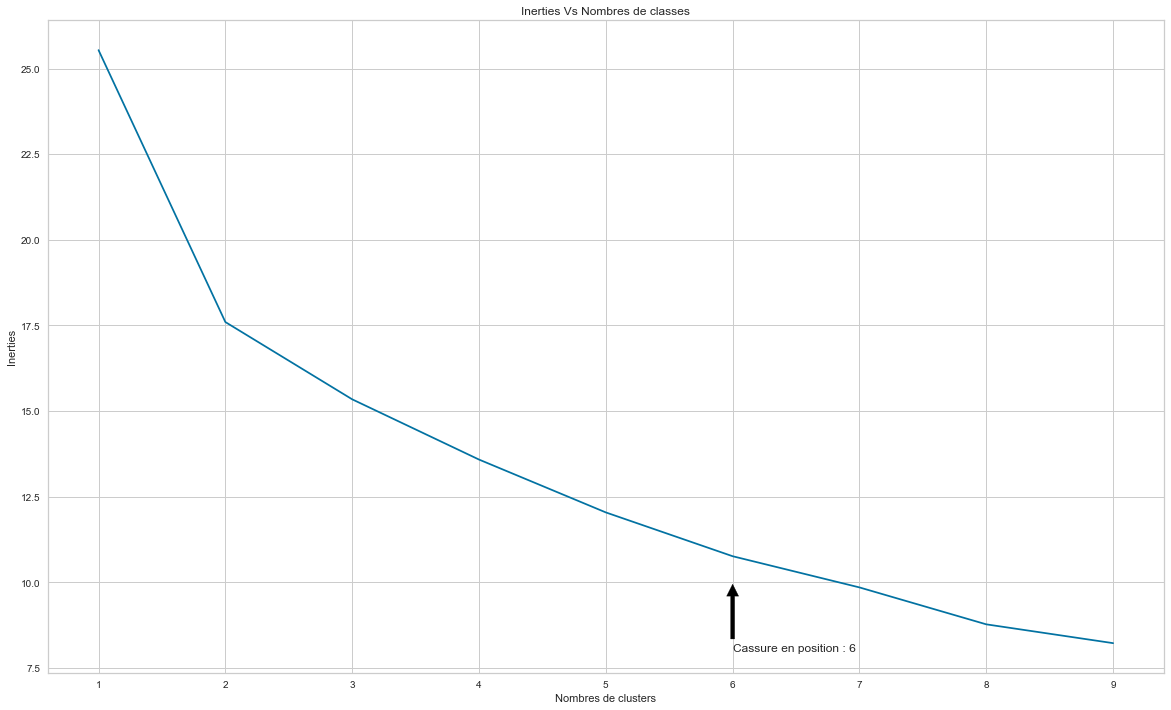

Le nombre de clusters est donc de 6 au niveau du coude.


In [106]:
# On stocke les inerties
inerties = []

# Boucle pour tester les possibilitees
for k in range (1,10) :
    
    # Pour chaque k on ajuste
    kmeans_v2 = KMeans (n_clusters=k)
    kmeans_v2.fit(DF_Scaled_2)
    
    # On stock l inertie qui corresponds
    inerties.append(kmeans_v2.inertia_)

# Visu du graph
fig = plt.figure(figsize=(20,12))
plt.plot(range(1,10), inerties)
plt.grid(True)
plt.title("Inerties Vs Nombres de classes")
plt.xlabel("Nombres de clusters")
plt.ylabel("Inerties")

# Visu 

plt.annotate("Cassure en position : 6",
            xy=(6, 10),
            xytext=(6, 8), 
            arrowprops={'facecolor':'black', 'shrink': 0.03},fontsize = 12
            )

# Visu de la figure
plt.show()

print('Le nombre de clusters est donc de 6 au niveau du coude.')

### Visu des clusters :

In [107]:
# Appliquer la classification K-Means :

x = DF_Scaled_2 # Mettre Z_Projected pour graph
kmeans_v2 = KMeans(n_clusters = 6,init = 'k-means++')

y_kmeans = kmeans_v2.fit_predict(x)

### Visu des centroids :

In [108]:
Centroides_v2 = kmeans_v2.cluster_centers_
Centroides_v2 = pd.DataFrame(Centroides_v2,columns= DF_Analyse.columns)
Centroides_v2

disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
0                  0.030244              0.217579            0.102976   
1                  0.009209              0.103981            0.188815   
2                  0.032053              0.239590            0.032896   
3                  0.173818              0.108609            0.361862   
4                  0.053535              0.228708            0.061207   
5                  0.011641              0.920909            0.654138   

   Croissance_population  ratio_proteine       PIB  Année_2017  \
0               0.241790        0.559287  0.273348    0.013809   
1               0.567399        0.272580  0.082589    0.008021   
2               0.547412        0.140596  0.052278    0.102535   
3               0.348769        0.676333  0.662970    0.043270   
4               0.287742        0.416679  0.105174    0.028428   
5               0.243446        0.450037  0.412747    0.010584   

   Indice_Stabilité  
0          0.795057  
1          0.591875  
2          0.265156  
3          0.833750  
4          0.519573  
5          0.771250

In [109]:
Cluster_1_v2 = pd.DataFrame(kmeans_v2.labels_,columns=['Cluster'])
Cluster_2_v2 = pd.DataFrame(Z_projected_v2.dropna(),columns=['Composante 1','Composante 2', 'Composante 3'])
Cluster_v2 = pd.concat([Cluster_1_v2 ,Cluster_2_v2],axis = 1)
Cluster_v2

Cluster  Composante 1  Composante 2  Composante 3
0          4     -0.058463     -0.052679      0.093513
1          4      0.015538      0.047227     -0.270714
2          2     -0.429627     -0.013233     -0.021368
3          0      0.260256     -0.027938      0.045241
4          1     -0.244117      0.338556      0.074348
..       ...           ...           ...           ...
124        2     -0.433926     -0.044086      0.121117
125        3      0.270526      0.245356     -0.012195
126        4     -0.095729     -0.050825      0.010142
127        3      0.329597     -0.414622      0.630828
128        1     -0.165949      0.344114     -0.091010

[129 rows x 4 columns]

In [110]:
Centroides_1_v2 = pd.DataFrame(kmeans_v2.labels_,columns=['Centroides'])
Centroides_2_v2 = pd.DataFrame(Z_projected_v2.dropna(),columns=['Centroides_1','Centroides_2', 'Centroides_3'])
Centroides_final_v2 = pd.concat([Cluster_1 ,Cluster_2],axis = 1)
Centroides_final_v2

Cluster  Composante 1  Composante 2  Composante 3
0          1     -0.400861      0.540698      0.302607
1          3      0.213820     -0.936543     -0.067579
2          0     -2.228886     -0.134784     -0.481027
3          1      1.388432      0.732909      0.365458
4          3     -1.227516     -1.734856      1.587246
..       ...           ...           ...           ...
124        0     -2.250966      0.347355      0.160261
125        3      1.773639     -1.149170      1.308566
126        0     -0.643478      0.082329     -0.599126
127        2      1.303666      7.423817      4.202284
128        3     -0.804172     -2.061104      1.301063

[129 rows x 4 columns]

Pour le calcul des données sur le graph 3D :

In [111]:
DF_graph_cluster_v2 = Z_projected_v2[['Composante 1','Composante 2','Composante 3']]
DF_graph_cluster_v2

Composante 1  Composante 2  Composante 3
0       -0.058463     -0.052679      0.093513
1        0.015538      0.047227     -0.270714
2       -0.429627     -0.013233     -0.021368
3        0.260256     -0.027938      0.045241
4       -0.244117      0.338556      0.074348
..            ...           ...           ...
124     -0.433926     -0.044086      0.121117
125      0.270526      0.245356     -0.012195
126     -0.095729     -0.050825      0.010142
127      0.329597     -0.414622      0.630828
128     -0.165949      0.344114     -0.091010

[129 rows x 3 columns]

Pour le calcul des centroides dans le graph 3D :

Composante 1  Composante 2  Composante 3
Cluster                                          
0.0          0.259557     -0.038823     -0.037249
1.0         -0.194067      0.234208     -0.019514
2.0         -0.503002      0.007736      0.081977
3.0          0.532478      0.204094      0.250645
4.0         -0.082898     -0.102100     -0.019971
5.0          0.356408     -0.069091      0.016287

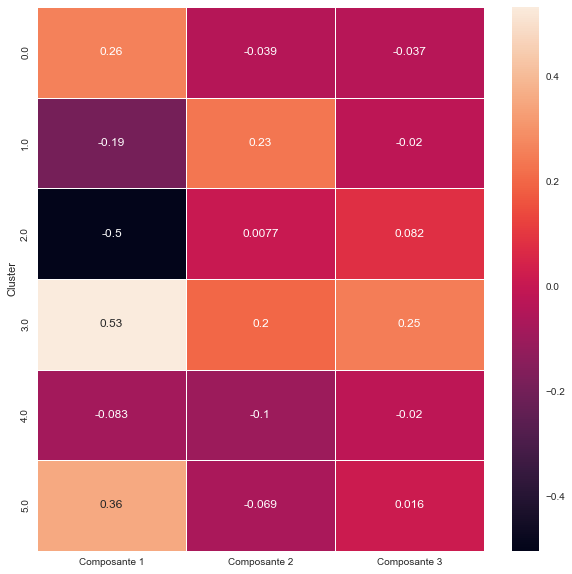

In [112]:
DF_Continent.reset_index()
DF_Cluster_v2 = pd.concat([Cluster_v2, Continent.Zone], axis = 1)

DF_Cluster_1_v2 = DF_Cluster_v2.groupby('Cluster').mean()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DF_Cluster_1_v2, annot = True, linewidths = .5, ax = ax)
DF_Cluster_1_v2

Scatterplot 3D :

In [113]:
import plotly.offline as pyoff

Cluster_v2.head()
scatter = dict(
    mode = "markers",
    name = "clusters",
    type = "scatter3d",
    x = DF_graph_cluster_v2['Composante 1'], y = DF_graph_cluster_v2['Composante 2'], z = DF_graph_cluster_v2['Composante 3'],
    marker = dict( size=5, color=Cluster_v2.Cluster )
)
clusters = dict(
    mode = 'markers',
    name = "centroides",
    type = "scatter3d",
    x = DF_Cluster_1_v2['Composante 1'], y = DF_Cluster_1_v2['Composante 2'], z = DF_Cluster_1_v2['Composante 3'],
    marker = dict(size=15, color = 'rgb(228,26,28)', symbol='cross')
)
layout = dict(
    title = 'clusters avec centroides',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),  
    )
)
fig = dict( data=[scatter, clusters], layout=layout )

pyoff.iplot(fig, filename='clusters avec centroides')

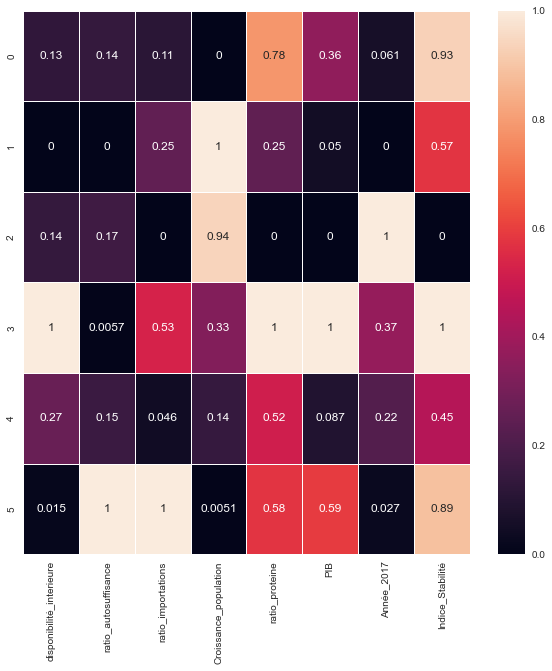

In [114]:
data = Centroides_v2
scaler = MinMaxScaler()
scaler.fit(Centroides_v2)
MinMaxScaler()
scaler.data_max_
DF_GZ = scaler.transform(data)
DF_GZ = pd.DataFrame(DF_GZ, columns = DF_Analyse.columns)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DF_GZ, annot = True, linewidths = .5, ax = ax)
DF_GZ['Cluster'] = np.array([0,1,2,3,4,5])

In [115]:
DF_GZ

disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
0                  0.127788              0.139056            0.112806   
1                  0.000000              0.000000            0.250978   
2                  0.138775              0.165998            0.000000   
3                  1.000000              0.005666            0.529529   
4                  0.269278              0.152678            0.045570   
5                  0.014773              1.000000            1.000000   

   Croissance_population  ratio_proteine       PIB  Année_2017  \
0               0.000000        0.781523  0.361999    0.061236   
1               1.000000        0.246360  0.049634    0.000000   
2               0.938618        0.000000  0.000000    1.000000   
3               0.328550        1.000000  1.000000    0.372952   
4               0.141127        0.515334  0.086618    0.215913   
5               0.005086        0.577599  0.590264    0.027122   

   Indice_Stabilité  Cluster  
0          0.931949        0  
1          0.574608        1  
2          0.000000        2  
3          1.000000        3  
4          0.447449        4  
5          0.890080        5

In [116]:
DF_GY = Centroides_final_v2.merge(DF,how='left',left_index=True,right_index=True)
DF_GY

Cluster  Composante 1  Composante 2  Composante 3  index  \
0          1     -0.400861      0.540698      0.302607      0   
1          3      0.213820     -0.936543     -0.067579      1   
2          0     -2.228886     -0.134784     -0.481027      2   
3          1      1.388432      0.732909      0.365458      3   
4          3     -1.227516     -1.734856      1.587246      4   
..       ...           ...           ...           ...    ...   
124        0     -2.250966      0.347355      0.160261    124   
125        3      1.773639     -1.149170      1.308566    125   
126        0     -0.643478      0.082329     -0.599126    126   
127        2      1.303666      7.423817      4.202284    127   
128        3     -0.804172     -2.061104      1.301063    128   

                      Zone  disponibilité_interieure  ratio_autosuffisance  \
0           Afrique du Sud                    2118.0                 78.71   
1                  Albanie                      51.0                 25.49   
2                  Algérie                     277.0                 99.28   
3                Allemagne                    1710.0                 88.54   
4                   Angola                     319.0                 13.17   
..                     ...                       ...                   ...   
124                 Égypte                    1227.0                 91.12   
125    Émirats arabes unis                     387.0                 12.40   
126               Équateur                     340.0                100.00   
127  États-Unis d'Amérique                   18345.0                119.45   
128           Îles Salomon                       6.0                  0.00   

     ratio_importations Continent  Croissance_population  ratio_proteine  \
0                 24.27   Afrique                   6.19           34.49   
1                 74.51    Europe                  -0.68           21.88   
2                  0.72   Afrique                   8.52           11.18   
3                 49.24    Europe                   1.83           32.78   
4                 86.83   Afrique                  14.61           24.72   
..                  ...       ...                    ...             ...   
124                8.96   Afrique                   9.09           19.04   
125              111.89      Asie                   3.15           26.46   
126                0.00  Amerique                   6.86           29.86   
127                0.67  Amerique                   2.74           43.59   
128              100.00   Oceanie                  11.32           21.81   

         PIB  Année_2017 Indice_Stabilité  
0    12701.3   57009.756            -0.28  
1    12771.0    2884.169             0.38  
2    11737.4   41389.189            -0.92  
3    52952.9   82658.409             0.59  
4     7310.9   29816.766            -0.33  
..       ...         ...              ...  
124  11014.5   96442.591            -1.42  
125  67183.6    9487.203             0.62  
126  11617.9   16785.361            -0.07  
127  60109.7  325084.756             0.34  
128   2663.9     636.039              0.2  

[129 rows x 15 columns]

Scaler par minmaxScaler :

#### Visu du choix des pays :

Choix numéro 1 proposition :

In [117]:
(DF_GY
        .query('Cluster == 1')
        .head(10)
        .sort_values(by= 'ratio_importations', ascending = False)
)

Cluster  Composante 1  Composante 2  Composante 3  index  \
19        1      0.911318     -0.211876     -0.517863     19   
10        1      1.886115     -0.224927      0.067968     10   
3         1      1.388432      0.732909      0.365458      3   
0         1     -0.400861      0.540698      0.302607      0   
16        1     -0.441222      0.360269     -1.655082     16   
12        1      1.170939      0.177673     -0.943704     12   
20        1      0.536080      0.885262     -1.422702     20   
9         1      1.679243      0.747688     -0.051917      9   
7         1      0.968914      1.231274     -0.250354      7   
15        1     -0.424357      0.265272     -0.608867     15   

                               Zone  disponibilité_interieure  \
19                         Bulgarie                     170.0   
10                         Autriche                     180.0   
3                         Allemagne                    1710.0   
0                    Afrique du Sud                    2118.0   
16               Bosnie-Herzégovine                      63.0   
12                          Barbade                      17.0   
20                          Bélarus                     332.0   
9                         Australie                    1243.0   
7                         Argentine                    1962.0   
15  Bolivie (État plurinational de)                     533.0   

    ratio_autosuffisance  ratio_importations Continent  Croissance_population  \
19                 62.94               63.53    Europe                  -2.57   
10                 82.22               61.11    Europe                   3.08   
3                  88.54               49.24    Europe                   1.83   
0                  78.71               24.27   Afrique                   6.19   
16                 96.83               15.87    Europe                  -5.39   
12                 88.24               11.76  Amerique                   0.68   
20                139.46                6.33    Europe                   0.28   
9                 102.09                1.29   Oceanie                   5.72   
7                 110.14                0.41  Amerique                   4.13   
15                100.00                0.19  Amerique                   6.17   

    ratio_proteine      PIB  Année_2017 Indice_Stabilité  
19           31.43  21387.3    7102.444             0.33  
10           34.77  54170.0    8819.901             1.05  
3            32.78  52952.9   82658.409             0.59  
0            34.49  12701.3   57009.756            -0.28  
16           17.39  13753.8    3351.525            -0.35  
12           41.33  15789.0     286.232             0.97  
20           40.45  18280.2    9450.231            -0.05  
9            46.25  48482.6   24584.620             0.89  
7            51.11  23597.1   43937.140             0.17  
15           37.47   8423.7   11192.855            -0.28

Choix numéro 2 proposition :

In [118]:
(DF_GY
        .query('Cluster == 1')
        .sort_values(by = 'PIB',ascending = False)
        .head(10)
        .sort_values(by= 'ratio_importations', ascending = False)
)

Cluster  Composante 1  Composante 2  Composante 3  index       Zone  \
33         1      2.119700     -0.059590     -0.125562     33   Danemark   
10         1      1.886115     -0.224927      0.067968     10   Autriche   
3          1      1.388432      0.732909      0.365458      3  Allemagne   
111        1      1.700147     -0.124053     -0.000440    111      Suède   
109        1      1.945451     -0.288472      0.266532    109     Suisse   
56         1      2.221782      0.130392     -0.359209     56    Islande   
23         1      1.495152      0.685221     -0.064437     23     Canada   
40         1      1.453709      0.250983     -0.702620     40   Finlande   
84         1      1.645500      0.215814     -0.387366     84    Norvège   
9          1      1.679243      0.747688     -0.051917      9  Australie   

     disponibilité_interieure  ratio_autosuffisance  ratio_importations  \
33                      167.0                103.59               79.64   
10                      180.0                 82.22               61.11   
3                      1710.0                 88.54               49.24   
111                     218.0                 72.02               38.53   
109                     138.0                 65.94               36.96   
56                       12.0                 83.33               16.67   
23                     1436.0                 98.68               12.67   
40                      133.0                 96.99               12.03   
84                      103.0                 98.06                1.94   
9                      1243.0                102.09                1.29   

    Continent  Croissance_population  ratio_proteine      PIB  Année_2017  \
33     Europe                   1.67           37.04  55356.7    5732.274   
10     Europe                   3.08           34.77  54170.0    8819.901   
3      Europe                   1.83           32.78  52952.9   82658.409   
111    Europe                   2.98           35.49  51948.0    9904.896   
109    Europe                   4.28           30.79  69103.6    8455.804   
56     Europe                   2.20           40.82  55638.5     334.393   
23   Amerique                   4.07           36.51  48317.1   36732.095   
40     Europe                   1.33           31.71  47570.1    5511.371   
84     Europe                   4.27           31.99  64050.8    5296.326   
9     Oceanie                   5.72           46.25  48482.6   24584.620   

    Indice_Stabilité  
33              0.87  
10              1.05  
3               0.59  
111             0.98  
109             1.26  
56              1.35  
23               1.1  
40              1.08  
84              1.17  
9               0.89

In [119]:
DF_GZ = DF_GZ[['Cluster','ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']]
DF_GZ

Cluster  ratio_autosuffisance  disponibilité_interieure  \
0        0              0.139056                  0.127788   
1        1              0.000000                  0.000000   
2        2              0.165998                  0.138775   
3        3              0.005666                  1.000000   
4        4              0.152678                  0.269278   
5        5              1.000000                  0.014773   

   ratio_importations  Croissance_population  ratio_proteine       PIB  \
0            0.112806               0.000000        0.781523  0.361999   
1            0.250978               1.000000        0.246360  0.049634   
2            0.000000               0.938618        0.000000  0.000000   
3            0.529529               0.328550        1.000000  1.000000   
4            0.045570               0.141127        0.515334  0.086618   
5            1.000000               0.005086        0.577599  0.590264   

   Indice_Stabilité  
0          0.931949  
1          0.574608  
2          0.000000  
3          1.000000  
4          0.447449  
5          0.890080

Création des DF par cluster pour scatterpolar :

In [120]:
Cluster_Zero = DF_GZ[DF_GZ.Cluster == 0]
Cluster_Un = DF_GZ[DF_GZ.Cluster == 1]
Cluster_Deux = DF_GZ[DF_GZ.Cluster == 2]
Cluster_Trois = DF_GZ[DF_GZ.Cluster == 3]
Cluster_Quatre = DF_GZ[DF_GZ.Cluster == 4]
Cluster_Cinq = DF_GZ[DF_GZ.Cluster == 5]

Cluster Zero :

In [121]:
data = Cluster_Zero
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
  theta = ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité'],
  fill='toself'
))

fig = px.line_polar(Cluster_Un, r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
 theta= ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']
 , line_close=True)
fig.update_traces(fill='toself')
fig.show()

Cluster Un :

In [122]:
data = Cluster_Un
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
  theta = ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité'],
  fill='toself'
))

fig = px.line_polar(Cluster_Un, r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
 theta= ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']
 , line_close=True)
fig.update_traces(fill='toself')
fig.show()

Cluster Deux :

In [123]:
data = Cluster_Deux
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
  theta = ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité'],
  fill='toself'
))

fig = px.line_polar(Cluster_Un, r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
 theta= ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']
 , line_close=True)
fig.update_traces(fill='toself')
fig.show()

Cluster Trois :

In [124]:
data = Cluster_Trois
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
  theta = ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité'],
  fill='toself'
))

fig = px.line_polar(Cluster_Un, r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
 theta= ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']
 , line_close=True)
fig.update_traces(fill='toself')
fig.show()

Cluster_Quatre

In [125]:
data = Cluster_Quatre
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
  theta = ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité'],
  fill='toself'
))

fig = px.line_polar(Cluster_Un, r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
 theta= ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']
 , line_close=True)
fig.update_traces(fill='toself')
fig.show()

Cluster_Cinq :

In [126]:
data = Cluster_Cinq
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
  theta = ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité'],
  fill='toself'
))

fig = px.line_polar(Cluster_Un, r = [data.ratio_autosuffisance.mean(), data.disponibilité_interieure.mean(), data.ratio_importations.mean(), data.Croissance_population.mean(), data.ratio_proteine.mean(), data.PIB.mean(), data.Indice_Stabilité.mean()],
 theta= ['ratio_autosuffisance', 'disponibilité_interieure', 'ratio_importations', 'Croissance_population','ratio_proteine','PIB','Indice_Stabilité']
 , line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [127]:
DF[DF['Zone'] == 'Norvège']

index     Zone  disponibilité_interieure  ratio_autosuffisance  \
84     84  Norvège                     103.0                 98.06   

    ratio_importations Continent  Croissance_population  ratio_proteine  \
84                1.94    Europe                   4.27           31.99   

        PIB  Année_2017 Indice_Stabilité  
84  64050.8    5296.326             1.17

In [128]:
# create dataframe
df_marks_0 = pd.DataFrame({'Index n°': [71],
     'Zone': ['Luxembourg'],
     'Disponiblité_interieure': [10.0],
     'Ratio_autosufissance': [0],
     'Ratio Importations':[110],
     'Continent':['Europe'],
     'Croissance_population':[9.1],
     'Ratio_proteine':[38.46],
     'PIB':[112308.0],
     'Population_2017':[5919100],
     'Indice stabilité':[1.33]})

# render dataframe as html
html_luxembourg = df_marks_0.to_html()

#write html to file
text_file = open("index.html", "w")
text_file.write(html_luxembourg)
text_file.close()


# create dataframe
df_marks_1 = pd.DataFrame({'Index n°': [71],
     'Zone': ['Suisse'],
     'Disponiblité_interieure': [138.0],
     'Ratio_autosufissance': [65.94],
     'Ratio Importations':[36.96],
     'Continent':['Europe'],
     'Croissance_population':[4.28],
     'Ratio_proteine':[30.79],
     'PIB':[69103.6],
     'Population_2017':[8455804],
     'Indice stabilité':[1.26]})

# render dataframe as html
html_suisse = df_marks_1.to_html()

#write html to file
text_file = open("index.html", "w")
text_file.write(html_suisse)
text_file.close()


# create dataframe
df_marks_2 = pd.DataFrame({'Index n°': [55],
     'Zone': ['Irlande'],
     'Disponiblité_interieure': [116.0],
     'Ratio_autosufissance': [94.83],
     'Ratio Importations':[85.34],
     'Continent':['Europe'],
     'Croissance_population':[2.99],
     'Ratio_proteine':[35.36],
     'PIB':[78655.6],
     'Population_2017':[47532790],
     'Indice stabilité':[1]})

# render dataframe as html
html_Irlande = df_marks_2.to_html()

#write html to file
text_file = open("index.html", "w")
text_file.write(html_Irlande)
text_file.close()


# create dataframe
df_marks_3 = pd.DataFrame({'Index n°': [10],
     'Zone': ['Autriche'],
     'Disponiblité_interieure': [180.0],
     'Ratio_autosufissance': [82.22],
     'Ratio Importations':[61.11],
     'Continent':['Europe'],
     'Croissance_population':[3.08],
     'Ratio_proteine':[34.77],
     'PIB':[54170.0],
     'Population_2017':[8819901],
     'Indice stabilité':[1.05]})

# render dataframe as html
html_autriche = df_marks_3.to_html()

#write html to file
text_file = open("index.html", "w")
text_file.write(html_autriche)
text_file.close()


# create dataframe
df_marks_5 = pd.DataFrame({'Index n°': [33],
     'Zone': ['Danemark'],
     'Disponiblité_interieure': [167.0],
     'Ratio_autosufissance': [103.59],
     'Ratio Importations':[79.64],
     'Continent':['Europe'],
     'Croissance_population':[1.67],
     'Ratio_proteine':[37.04],
     'PIB':[55356.7],
     'Population_2017':[5732274],
     'Indice stabilité':[0.87]})


# render dataframe as html
html_Danemark = df_marks_5.to_html()

#write html to file
text_file = open("index.html", "w")
text_file.write(html_Danemark)
text_file.close()

In [129]:
import folium

Pays_ciblés = folium.Map(location=[52.36993000000007, 4.907880000000034], tiles="cartodb positron", zoom_start=4)


folium.Marker(location=[49.8158683,6.1296751], 
              tooltip='<strong>Luxembourg</strong>',
              popup=(html_luxembourg),
              icon=folium.Icon(icon="info-sign", color="blue")).add_to(Pays_ciblés)

folium.Marker(location=[46.7985624,8.2319736], 
              tooltip='<strong>Suisse</strong>',
              popup=(html_suisse),
              icon=folium.Icon(icon="info-sign", color="blue")).add_to(Pays_ciblés)

folium.Marker(location=[53.349805,-6.260310], 
              tooltip='<strong>Irlande</strong>',
              popup=(html_Irlande),
              icon=folium.Icon(icon="info-sign", color="blue")).add_to(Pays_ciblés)

folium.Marker(location=[47.59397,14.12456], 
              tooltip='<strong>Autriche</strong>',
              popup=(html_autriche),
              icon=folium.Icon(icon="info-sign", color="blue")).add_to(Pays_ciblés)


folium.Marker(location=[56.266174,9.503045], 
              tooltip='<strong>Danemark</strong>',
              popup=(html_Danemark),
              icon=folium.Icon(icon="info-sign", color="blue")).add_to(Pays_ciblés)
Pays_ciblés